In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as stats
import seaborn as sns

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
def reverse_complement(dna):
    """ function that reverse complements DNA
    dna: input dna sequence
    """
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A', 'a': 't', 'c': 'g', 'g': 'c', 't': 'a'}
    return ''.join([complement[base] for base in dna[::-1]])


codontable_standard = {
    'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
    'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
    'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
    'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
    'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
    'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
    'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
    'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
    'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
    'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
    'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
    'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
    'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
    'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
    'TAC':'Y', 'TAT':'Y', 'TAA':'*', 'TAG':'*',
    'TGC':'C', 'TGT':'C', 'TGA':'*', 'TGG':'W',
    }

In [281]:
validations_df = pd.read_csv('./validations_table_v4.csv', index_col=0)

validations_df.head(100)

,codon,wt,measured,mtx1,mtx2,dmso1,dmso2,mtx_average,dmso_average,hap_fc_1,...,hap_cy_2,hap_fc_average,hap_cy_average,2nd_batch_FC,2nd_batch_CY,adjusted_2nd_batch_FC,adjusted_2nd_batch_CY,combined_hap_fc,combined_hap_cy,escape_outlier
136,8,S,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
168,10,W,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.111533,0.002547,0.219011,0.016087,0.219011,0.016087,Yes
227,12,Q,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.049200,0.086733,0.126145,0.139102,0.126145,0.139102,Yes
261,14,G,W,0.01380,0.01360,0.21628,0.21208,0.0137,0.21418,0.20784,...,0.01068,0.20750,0.01094,NaN,NaN,NaN,NaN,0.207500,0.010940,No
263,14,G,Y,0.01388,0.01552,0.20184,0.20676,0.0147,0.20430,0.16984,...,0.03208,0.16960,0.03144,NaN,NaN,NaN,NaN,0.169600,0.031440,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.100987,0.004160,0.203298,0.018444,0.203298,0.018444,Yes
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,0.14988,...,0.01560,0.15884,0.01588,NaN,NaN,NaN,NaN,0.158840,0.015880,No
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,0.16264,...,0.02148,0.15546,0.02130,NaN,NaN,NaN,NaN,0.155460,0.021300,No
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,0.21184,...,0.01008,0.20648,0.01174,NaN,NaN,NaN,NaN,0.206480,0.011740,Yes


In [282]:
wt_sites = validations_df[validations_df['hap_cy_average']>=0.10]
wt_sites

,codon,wt,measured,mtx1,mtx2,dmso1,dmso2,mtx_average,dmso_average,hap_fc_1,...,hap_cy_2,hap_fc_average,hap_cy_average,2nd_batch_FC,2nd_batch_CY,adjusted_2nd_batch_FC,adjusted_2nd_batch_CY,combined_hap_fc,combined_hap_cy,escape_outlier
455,23,A,N,0.03480,0.03048,0.21620,0.21664,0.03264,0.21642,0.10248,...,0.12392,0.10310,0.12496,0.048547,0.079933,0.125171,0.129166,0.114136,0.127063,Yes
582,29,G,Q,0.02632,0.02576,0.20440,0.21456,0.02604,0.20948,0.11752,...,0.10640,0.12586,0.10442,0.055773,0.043720,0.135938,0.076250,0.130899,0.090335,No
787,39,N,F,0.06484,0.06144,0.21944,0.20776,0.06314,0.21360,0.12744,...,0.11560,0.12614,0.11660,NaN,NaN,NaN,NaN,0.126140,0.116600,No
788,39,N,Y,0.09440,0.09760,0.21860,0.20092,0.09600,0.20976,0.11020,...,0.11680,0.10770,0.11656,NaN,NaN,NaN,NaN,0.107700,0.116560,Yes
1205,59,A,P,0.09676,0.09640,0.18936,0.18932,0.09658,0.18934,0.12072,...,0.12680,0.12320,0.13088,NaN,NaN,NaN,NaN,0.123200,0.130880,No
1350,66,S,M,0.12360,0.12680,0.22968,0.22172,0.12520,0.22570,0.12692,...,0.10080,0.13146,0.10020,NaN,NaN,NaN,NaN,0.131460,0.100200,No
1451,71,C,A,0.08696,0.08612,0.22280,0.21848,0.08654,0.22064,0.12232,...,0.12760,0.11824,0.12520,NaN,NaN,NaN,NaN,0.118240,0.125200,No
1527,74,L,Q,NaN,NaN,NaN,NaN,NaN,NaN,0.13224,...,0.13972,0.12538,0.14122,NaN,NaN,NaN,NaN,0.125380,0.141220,Yes
1551,75,E,R,0.04728,0.04864,0.22176,0.19708,0.04796,0.20942,0.12676,...,0.12520,0.12306,0.12676,NaN,NaN,NaN,NaN,0.123060,0.126760,No
1830,89,S,V,0.05984,0.06528,0.18712,0.18460,0.06256,0.18586,0.12372,...,0.11892,0.12182,0.11874,0.050413,0.079453,0.127952,0.128465,0.124886,0.123602,No


In [283]:
conserved_sites = [345,575,582,745,1023,1410,1770,1778,1830,1854,1877,1915,1921,2298,2445,2467,2534,2536,3156,3208,3249,3250,3274,3275]
wt_like = [455,787,788,1527,2967]

sites_list = conserved_sites+wt_like
[len(x) for x in [conserved_sites, wt_like, sites_list]]

[24, 5, 29]

In [284]:
selected_sites_data = validations_df.loc[sites_list]
selected_sites_data
# T86M was the strain for which growth rates were dropped due to problem with the plate cover during the experiment.

,codon,wt,measured,mtx1,mtx2,dmso1,dmso2,mtx_average,dmso_average,hap_fc_1,...,hap_cy_2,hap_fc_average,hap_cy_average,2nd_batch_FC,2nd_batch_CY,adjusted_2nd_batch_FC,adjusted_2nd_batch_CY,combined_hap_fc,combined_hap_cy,escape_outlier
345,18,A,W,0.01260,0.01624,0.20344,0.20144,0.01442,0.20244,0.21076,...,0.00764,0.21594,0.00850,NaN,NaN,NaN,NaN,0.215940,0.008500,No
575,29,G,P,0.01356,0.01596,0.21760,0.21612,0.01476,0.21686,0.22432,...,0.01624,0.21842,0.01524,0.114280,0.003200,0.223103,0.017041,0.220762,0.016141,No
582,29,G,Q,0.02632,0.02576,0.20440,0.21456,0.02604,0.20948,0.11752,...,0.10640,0.12586,0.10442,0.055773,0.043720,0.135938,0.076250,0.130899,0.090335,No
745,37,L,F,0.01696,0.01712,0.21920,0.21992,0.01704,0.21956,0.22156,...,0.01736,0.22164,0.01634,0.109027,0.003933,0.215276,0.018113,0.218458,0.017226,Yes
1023,50,H,Q,0.01592,0.01736,0.21280,0.20736,0.01664,0.21008,0.22388,...,0.00564,0.22108,0.00642,0.113560,0.003680,0.222030,0.017743,0.221555,0.012081,Yes
1410,69,E,V,0.08168,0.08544,0.22700,0.23080,0.08356,0.22890,0.20668,...,0.01376,0.20546,0.01450,0.098147,0.003667,0.199067,0.017723,0.202264,0.016112,No
1770,86,T,M,0.10000,0.10080,0.20384,0.20020,0.10040,0.20202,0.15352,...,0.11636,0.16594,0.07756,NaN,NaN,NaN,NaN,0.165940,NaN,No
1778,86,T,N,0.02124,0.02380,0.20248,0.19744,0.02252,0.19996,0.23732,...,0.01528,0.23300,0.01576,0.109960,0.003773,0.216667,0.017879,0.224833,0.016819,No
1830,89,S,V,0.05984,0.06528,0.18712,0.18460,0.06256,0.18586,0.12372,...,0.11892,0.12182,0.11874,0.050413,0.079453,0.127952,0.128465,0.124886,0.123602,No
1854,90,P,M,0.02884,0.03076,0.20568,0.19864,0.02980,0.20216,0.18576,...,0.01504,0.17446,0.01498,0.093240,0.003813,0.191757,0.017937,0.183108,0.016459,No


In [285]:
selected_sites_data.at[1770, 'hap_cy_2'] = np.NaN
selected_sites_data.at[1770, 'hap_cy_average'] = 0.03876

selected_sites_data.loc[1770]

codon                         86
wt                             T
measured                       M
mtx1                         0.1
mtx2                      0.1008
dmso1                    0.20384
dmso2                     0.2002
mtx_average               0.1004
dmso_average             0.20202
hap_fc_1                 0.15352
hap_fc_2                 0.17836
hap_cy_1                 0.03876
hap_cy_2                     NaN
hap_fc_average           0.16594
hap_cy_average           0.03876
2nd_batch_FC                 NaN
2nd_batch_CY                 NaN
adjusted_2nd_batch_FC        NaN
adjusted_2nd_batch_CY        NaN
combined_hap_fc          0.16594
combined_hap_cy              NaN
escape_outlier                No
Name: 1770, dtype: object

Text(0, 0.5, 'scFCY1 mutant growth rate in cytosine (OD/h)')

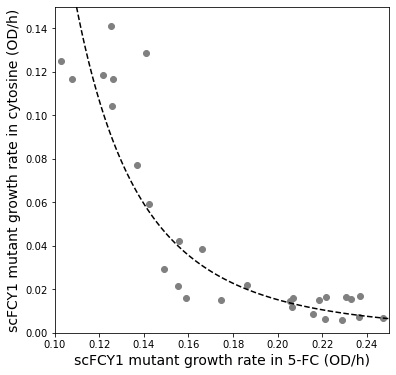

In [286]:
plt.figure(figsize=(6,6))
plt.scatter(selected_sites_data['hap_fc_average'], selected_sites_data['hap_cy_average'], color = 'grey')
plt.xlim(0.1, 0.25)
plt.ylim(0,0.15)

plt.plot([2**x for x in np.linspace(-3.2, -1.9, 100)], [(2**(-3.8178*x+-14.9037)) for x in np.linspace(-3.2, -1.9, 100)], 'k--')


plt.xlabel('scFCY1 mutant growth rate in 5-FC (OD/h)', fontsize=14)
plt.ylabel('scFCY1 mutant growth rate in cytosine (OD/h)', fontsize=14)

In [287]:
neoformans_seq_aa = "MSPVEGSPAKPEDYPHFMSVAHEQALKSLSEGGIPIGAALVHLPTSRIISRGHNNRVQLSSNVRHGEMDCLENLGRVPEGLLSECAMFTTLSPCIMCSATCILYKIRTVVLAENENFLG-GEQLLRDNGANVINLDSEEIKNMMKNWINSPRGKVWNEDIGEVTGS"

ref_align_cerevisiae_aa = "--MVTGGMASKWD-QKGMDIAYEEAALGYKEGGVPIGGCLINNKDGSVLGRGHNMRFQKGSATLHGEISTLENCGRLEGKVYKDTTLYTTLSPCDMCTGAIIMYGIPRCVVGENVNFKSKGEKYLQTRGHEVVVVDDERCKKIMKQFIDE-RPQDWFEDIGE----"

print(len(neoformans_seq_aa), len(ref_align_cerevisiae_aa))

166 166


In [288]:
align_pos_to_cer_pos = {}

cer_pos_to_align_pos = {}

cer_pos = 1

for aa in range(0, 166):
    
    if ref_align_cerevisiae_aa[aa] != '-':
        
        align_pos_to_cer_pos[aa] = cer_pos
        
        cer_pos_to_align_pos[cer_pos]=aa
        
        cer_pos+=1
        
    else:
        align_pos_to_cer_pos[aa]='gap'
        
#align_pos_to_cer_pos, cer_pos_to_align_pos

In [289]:
align_pos_to_neo_pos = {}

neo_pos = 1

for aa in range(0, 166):
    
    if neoformans_seq_aa[aa] != '-':
        
        align_pos_to_neo_pos[aa] = neo_pos
        
        neo_pos+=1
        
    else:
        align_pos_to_neo_pos[aa]='gap'
        
#align_pos_to_neo_pos

In [290]:
cerevisiae_to_neoformans = {}

pos = 1

for x in range(0,166):
    
    aa_cerevisiae = ref_align_cerevisiae_aa[x]
        
    if aa_cerevisiae != '-':
        cerevisiae_to_neoformans[pos] = neoformans_seq_aa[x]
        pos+=1
        
cerevisiae_to_neoformans[64]
    

'E'

In [291]:
insert_sequence = "TGATGAGAGCCAGCTTAAAGAGTTAAAAATTTCATAGCTAATGTCTCCTGTTGAAGGTTCTCCAGCTAAGCCAGAAGATTACCCACACTTCATGTCCGTTGCTCACGAACAAGCTTTGAAGTCTTTGTCTGAAGGTGGTATTCCAATTGGTGCTGCTTTGGTTCATTTGCCAACTTCTAGAATTATTTCCAGAGGTCACAACAACAGAGTCCAATTATCTTCTAACGTCCGTCACGGTGAAATGGACTGTTTGGAAAATTTAGGCAGAGTTCCAGAAGGTTTGTTGTCCGAATGTGCTATGTTTACCACCCTATCACCATGTATCATGTGTAGTGCCACTTGCATCTTGTACAAGATCAGAACCGTTGTCTTGGCTGAAAATGAAAACTTCTTGGGTGGTGAGCAATTGTTGAGAGACAACGGTGCCAACGTTATCAACTTAGATTCTGAAGAAATCAAAAACATGATGAAGAACTGGATTAACTCCCCAAGAGGTAAGGTCTGGAACGAAGATATCGGTGAAGTCACTGGTTCCTGAAGCACGCAGCACGCTGTATTTACGTATTTAATTTTATATA"
# the C. neoformans sequence in the twist vector

In [292]:
len(insert_sequence)

578

In [293]:
insert_sequence

'TGATGAGAGCCAGCTTAAAGAGTTAAAAATTTCATAGCTAATGTCTCCTGTTGAAGGTTCTCCAGCTAAGCCAGAAGATTACCCACACTTCATGTCCGTTGCTCACGAACAAGCTTTGAAGTCTTTGTCTGAAGGTGGTATTCCAATTGGTGCTGCTTTGGTTCATTTGCCAACTTCTAGAATTATTTCCAGAGGTCACAACAACAGAGTCCAATTATCTTCTAACGTCCGTCACGGTGAAATGGACTGTTTGGAAAATTTAGGCAGAGTTCCAGAAGGTTTGTTGTCCGAATGTGCTATGTTTACCACCCTATCACCATGTATCATGTGTAGTGCCACTTGCATCTTGTACAAGATCAGAACCGTTGTCTTGGCTGAAAATGAAAACTTCTTGGGTGGTGAGCAATTGTTGAGAGACAACGGTGCCAACGTTATCAACTTAGATTCTGAAGAAATCAAAAACATGATGAAGAACTGGATTAACTCCCCAAGAGGTAAGGTCTGGAACGAAGATATCGGTGAAGTCACTGGTTCCTGAAGCACGCAGCACGCTGTATTTACGTATTTAATTTTATATA'

In [294]:
cds_start = 40
insert_sequence[40:43]

'ATG'

In [295]:
cds_end = 535
insert_sequence[535:538]

'TGA'

In [296]:
codon_dict_nuc = {}

for x in range(0,166):
    n_codon = x + 1
    
    codon = insert_sequence[((x*3)+40):((x*3)+43)]
    
    codon_dict_nuc[n_codon] = codon
    
codon_dict_nuc[67]

'GAA'

In [297]:
def generate_primer(codon, mutant_aa, seed=1, name = 'primer', 
                    reference="Philippe D, FCY1 DMS project, see https://benchling.com/s/seq-GqBWr6mYXuDa56uouvyU?m=slm-dc8oeLvKD2NWhXYbn98i"):
    
    codon_start = ((codon-1)*3)+40
    codon_end = ((codon-1)*3)+43
    wt_codon = insert_sequence[((codon-1)*3)+40:((codon-1)*3)+43]
    wt_aa = codontable_standard[wt_codon]
    
    prefix_start = codon_start-13
    prefix_end = codon_start
    prefix = insert_sequence[prefix_start:prefix_end]
    
    suffix_start = codon_end
    suffix_end = codon_end+14
    suffix = insert_sequence[suffix_start:suffix_end]
    
    
    mutant_codons = [x for x in list(codontable_standard.keys()) if codontable_standard[x] == mutant_aa]
    
    random.seed(seed)
    
    mut_codon = random.choice(mutant_codons).lower()
    
    forward = prefix + mut_codon + suffix
    reverse = reverse_complement(forward)
    
    primer_name_prefix = name+" "+wt_aa+str(codon)+mutant_aa+' ('+mut_codon+') '
    
    forward_series = pd.Series({'sequence':forward, 'Description': (primer_name_prefix+'forward'),
                                'reference':reference})
    reverse_series = pd.Series({'sequence':reverse, 'Description': (primer_name_prefix+'reverse'),
                                'reference':reference})

    return forward_series, reverse_series
    
    print(forward)
    print(reverse)
    
test = generate_primer(67, "A", name='Crypto.neo.neo.JEC21 FCY1 codon optimized mutagenesis oligos')[0]

In [298]:
test

sequence                          CGTCCGTCACGGTgccATGGACTGTTTGGA
Description    Crypto.neo.neo.JEC21 FCY1 codon optimized muta...
reference      Philippe D, FCY1 DMS project, see https://benc...
dtype: object

In [299]:
sorted(selected_sites_data.index)

[345,
 455,
 575,
 582,
 745,
 787,
 788,
 1023,
 1410,
 1527,
 1770,
 1778,
 1830,
 1854,
 1877,
 1915,
 1921,
 2298,
 2445,
 2467,
 2534,
 2536,
 2967,
 3156,
 3208,
 3249,
 3250,
 3274,
 3275]

In [22]:
forward_primers = []
reverse_primers = []

for mutant in sorted(selected_sites_data.index):
    mutant_info  = selected_sites_data.loc[mutant]
    
    codon = mutant_info['codon']
    wt = mutant_info['wt']
    measured = mutant_info['measured']
    fc_phen = mutant_info['hap_fc_average']
    
    codon_align_pos = cer_pos_to_align_pos[codon]
    
    crypto_neo_codon = align_pos_to_neo_pos[codon_align_pos]
    
    primers = generate_primer(crypto_neo_codon, measured, name='Crypto.neo.JEC21 FCY1 c. opt. mutagenesis')
    print(mutant, '\t' , wt, '\t', codon, '\t', measured, '\t',  wt, '\t', crypto_neo_codon, '\t', measured)
    
    forward_primers.append(primers[0])
    reverse_primers.append(primers[1])

forward_df = pd.DataFrame(forward_primers)
reverse_df = pd.DataFrame(reverse_primers)

345 	 A 	 18 	 W 	 A 	 21 	 W
455 	 A 	 23 	 N 	 A 	 26 	 N
575 	 G 	 29 	 P 	 G 	 32 	 P
582 	 G 	 29 	 Q 	 G 	 32 	 Q
745 	 L 	 37 	 F 	 L 	 40 	 F
787 	 N 	 39 	 F 	 N 	 42 	 F
788 	 N 	 39 	 Y 	 N 	 42 	 Y
1023 	 H 	 50 	 Q 	 H 	 53 	 Q
1410 	 E 	 69 	 V 	 E 	 72 	 V
1527 	 L 	 74 	 Q 	 L 	 77 	 Q
1770 	 T 	 86 	 M 	 T 	 89 	 M
1778 	 T 	 86 	 N 	 T 	 89 	 N
1830 	 S 	 89 	 V 	 S 	 92 	 V
1854 	 P 	 90 	 M 	 P 	 93 	 M
1877 	 C 	 91 	 P 	 C 	 94 	 P
1915 	 M 	 93 	 L 	 M 	 96 	 L
1921 	 M 	 93 	 F 	 M 	 96 	 F
2298 	 N 	 111 	 W 	 N 	 114 	 W
2445 	 G 	 118 	 W 	 G 	 120 	 W
2467 	 E 	 119 	 F 	 E 	 121 	 F
2534 	 L 	 122 	 N 	 L 	 124 	 N
2536 	 L 	 122 	 H 	 L 	 124 	 H
2967 	 Q 	 143 	 M 	 Q 	 145 	 M
3156 	 W 	 152 	 M 	 W 	 155 	 M
3208 	 E 	 154 	 H 	 E 	 157 	 H
3249 	 I 	 156 	 Q 	 I 	 159 	 Q
3250 	 I 	 156 	 H 	 I 	 159 	 H
3274 	 G 	 157 	 D 	 G 	 160 	 D
3275 	 G 	 157 	 E 	 G 	 160 	 E


In [300]:
forward_df

,sequence,Description,reference
0,CTTCATGTCCGTTtggCACGAACAAGCTTT,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis A21W...,"Philippe D, FCY1 DMS project, see https://benc..."
1,TCACGAACAAGCTaacAAGTCTTTGTCTGA,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis L26N...,"Philippe D, FCY1 DMS project, see https://benc..."
2,GTCTTTGTCTGAAcccGGTATTCCAATTGG,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis G32P...,"Philippe D, FCY1 DMS project, see https://benc..."
3,GTCTTTGTCTGAAcaaGGTATTCCAATTGG,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis G32Q...,"Philippe D, FCY1 DMS project, see https://benc..."
4,AATTGGTGCTGCTttcGTTCATTTGCCAAC,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis L40F...,"Philippe D, FCY1 DMS project, see https://benc..."
5,TGCTGCTTTGGTTttcTTGCCAACTTCTAG,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis H42F...,"Philippe D, FCY1 DMS project, see https://benc..."
6,TGCTGCTTTGGTTtacTTGCCAACTTCTAG,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis H42Y...,"Philippe D, FCY1 DMS project, see https://benc..."
7,TATTTCCAGAGGTcaaAACAACAGAGTCCA,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis H53Q...,"Philippe D, FCY1 DMS project, see https://benc..."
8,AATGGACTGTTTGgtcAATTTAGGCAGAGT,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis E72V...,"Philippe D, FCY1 DMS project, see https://benc..."
9,AAATTTAGGCAGAcaaCCAGAAGGTTTGTT,Crypto.neo.JEC21 FCY1 c. opt. mutagenesis V77Q...,"Philippe D, FCY1 DMS project, see https://benc..."


In [24]:
forward_df.to_csv('./neoformans_mutants_for.csv')
reverse_df.to_csv('./neoformans_mutants_rev.csv')

## Analyze FoldX results for the predicted structure

In [493]:
pdb_interface_annot = './FCY1_CNeo/dist_regions_FCY1_CNeo_bio_check_Repair.pdb'

from collections import Counter

In [494]:
line_len_counter = Counter()
dict_of_dict_interface = {}
# containers to read the pdb file and extract interface info

with open(pdb_interface_annot, 'r') as source:
    # open pdb file
    
    for line in source:
        line = line.strip('\n')
        line=[x for x in line.split(' ') if x != '']
        # loop through line and format lines
        
        line_len_counter[len(line)] +=1
        # increment line counter. This is used to help verify that 
        # the pdb file is formatted uniformly (sometimes separators
        # have unequal number of spaces). Some manual adjustement of
        # the source file might be required
        
                
        if int(line[5]) not in list(dict_of_dict_interface.keys()):
            # check if there is already an entry for the residue
            
            aa_dict = {}
            # container for info on the annotation
            
            aa_dict['aa'] = line[3]
            aa_dict['interface'] = float(line[10])
            # extract boththe residue an the interface annotation
            
            dict_of_dict_interface[int(line[5])] = aa_dict
            # add info to dict of dict
            
            
            
print(line_len_counter)    

Counter({11: 2518})


In [495]:
chain_B_indexes = range(1,166)
# define the pdb residue coordinates for chain B 
# corresponding to the two different chains

dict_chain_A ={}
# residue : interface annotation    pairs
# for chain B

for x in chain_A_indexes:
    # loop through annotations for chain B
    
    entry = dict_of_dict_interface[x]
    dict_chain_A[x] = entry['interface']
    # extract info, add entry to chain dict
    
len(dict_chain_A)
# AlphaFold provides full length predictions

165

In [506]:
list(dict_chain_A.values()).count(0),list(dict_chain_A.values()).count(0.75),list(dict_chain_A.values()).count(1)

(102, 31, 32)

In [511]:
dms_df = pd.read_csv('./annotated_df_v5.tsv',sep='\t',index_col=0)
dms_df

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,interface,ddG_struc_HET,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site
0,2,V,*,-3.848973,-3.934894,0.096862,-3.763052,0.213533,-4.425231,-4.769127,...,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,NaN,NaN
1,2,V,G,-0.804103,-0.779520,0.051921,-0.828687,0.074847,-4.261140,-4.305138,...,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.000000,NaN
2,2,V,A,-0.725852,-0.455205,0.315889,-0.996499,0.119774,-3.792236,-3.869612,...,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.129032,NaN
3,2,V,V,-0.587940,-0.506614,0.391231,-0.669265,0.074170,-4.350391,-4.148804,...,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.096774,NaN
4,2,V,L,-0.906831,-0.790490,0.306158,-1.023172,0.072184,-4.320468,-4.381116,...,0.0,NaN,NaN,NaN,NaN,1.4201,0.284848,31.314286,0.032258,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,158,E,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,-0.08375,-0.23928,0.01440,-0.15748,0.0553,0.595794,20.715000,0.009479,5.711372
3293,158,E,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,-0.63414,-1.22820,0.26376,0.25662,0.0553,0.595794,20.715000,0.037915,5.711372
3294,158,E,R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,-0.84740,-1.73269,0.27192,0.09690,0.0553,0.595794,20.715000,0.004739,5.711372
3295,158,E,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.31390,0.64312,0.10866,0.19564,0.0553,0.595794,20.715000,0.000000,5.711372


In [519]:
silent = dms_df[dms_df['measured']==dms_df['wt']]

sc_interface_dict = {}

for x in range(2,159):
    
    sc_interface_dict[x] = float(silent[silent['codon']==x]['interface'])

sc_interface_dict[2]

list(sc_interface_dict.values()).count(0),list(sc_interface_dict.values()).count(0.75),list(sc_interface_dict.values()).count(1)

(91, 38, 28)

In [570]:
inter_switch = np.array([[0,0,0],
                         [0,0,0],
                         [0,0,0]])

array_pos_dict = {0:0, 0.75:1, 1:2}

n_sites = 0

for codon in sc_interface_dict.keys():
    
    codon_align_pos = cer_pos_to_align_pos[codon]
    
    crypto_neo_codon = align_pos_to_neo_pos[codon_align_pos]
    
    if crypto_neo_codon != 'gap':
    
        inter_sc = sc_interface_dict[codon]
        inter_cn = dict_chain_A[crypto_neo_codon]
    
        inter_switch[array_pos_dict[inter_sc], array_pos_dict[inter_cn]] += 1
        
         
        
        n_sites+=1
        
        if inter_sc != inter_cn:
            print(codon, inter_sc, 'to', crypto_neo_codon, inter_cn)
        
    else:
        print(codon, crypto_neo_codon, sc_interface_dict[codon])
    
inter_switch

61 0.75 to 64 1.0
77 0.75 to 80 1.0
79 0.75 to 82 1.0
80 1.0 to 83 0.75
102 0.75 to 105 1.0
104 0.0 to 107 0.75
117 gap 1.0
119 0.75 to 121 0.0
120 0.75 to 122 0.0
122 0.75 to 124 0.0
123 0.75 to 125 0.0
124 0.75 to 126 0.0
125 1.0 to 127 0.0
126 0.75 to 128 0.0
127 0.75 to 129 0.0
149 0.0 to 152 0.75
150 0.0 to 153 0.75
151 0.75 to 154 1.0


array([[88,  3,  0],
       [ 7, 26,  5],
       [ 1,  1, 25]])

In [548]:
inter_switch = inter_switch/inter_switch.sum(axis=1)

inter_switch

array([[0.96703297, 0.07894737, 0.        ],
       [0.07692308, 0.68421053, 0.18518519],
       [0.01098901, 0.02631579, 0.92592593]])

Text(83.40000000000006, 0.5, 'Annotation in scFCY1')

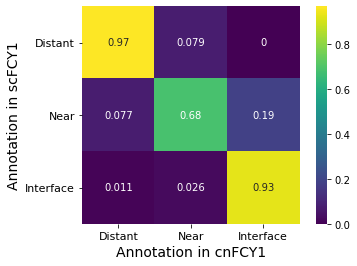

In [568]:
sns.heatmap(inter_switch, cmap='viridis',annot=True, square=True)

plt.xticks([0.5,1.5,2.5], ['Distant', 'Near', 'Interface'], fontsize=11)
plt.yticks([0.5,1.5,2.5], ['Distant', 'Near', 'Interface'], fontsize=11, rotation=0)

plt.xlabel('Annotation in cnFCY1', fontsize=14)
plt.ylabel('Annotation in scFCY1', fontsize=14)

In [645]:
cn_ddg_df = pd.read_csv('./final_mat_FCY1_CNeo_tabs.txt', sep='\t')

cn_ddg_df

,Chain,WT_res,Position,Mut_res,Mean_ddG_stab_HET,Mean_ddG_stab_HM,Mean_ddG_int_HET,Mean_ddG_int_HM
0,B,A,112,G,1.14310,2.30577,0.0000,0.00000
1,B,A,112,A,0.00000,0.00000,0.0000,0.00000
2,B,A,112,V,4.79772,9.11676,0.0000,0.00000
3,B,A,112,L,4.37677,8.43779,0.0000,0.00000
4,B,A,112,I,6.56459,11.92462,0.0000,0.00000
...,...,...,...,...,...,...,...,...
3295,B,Y,14,D,3.74113,7.55375,0.0051,0.00510
3296,B,Y,14,E,3.18125,6.31620,0.0051,0.00510
3297,B,Y,14,K,2.06307,4.11886,-0.0022,-0.00218
3298,B,Y,14,R,1.88732,3.78989,-0.0073,-0.00730


## one on one growth curves for ScFCY1 and CnFCY1 mutants

In [317]:
validations_df.loc[1770]

codon                         86
wt                             T
measured                       M
mtx1                         0.1
mtx2                      0.1008
dmso1                    0.20384
dmso2                     0.2002
mtx_average               0.1004
dmso_average             0.20202
hap_fc_1                 0.15352
hap_fc_2                 0.17836
hap_cy_1                 0.03876
hap_cy_2                 0.11636
hap_fc_average           0.16594
hap_cy_average           0.07756
2nd_batch_FC                 NaN
2nd_batch_CY                 NaN
adjusted_2nd_batch_FC        NaN
adjusted_2nd_batch_CY        NaN
combined_hap_fc          0.16594
combined_hap_cy              NaN
escape_outlier                No
Name: 1770, dtype: object

In [318]:
validations_df.at[1770, 'hap_cy_average'] = 0.03876
validations_df.at[1770, 'hap_cy_2'] =np.NaN

(0.0, 0.15)

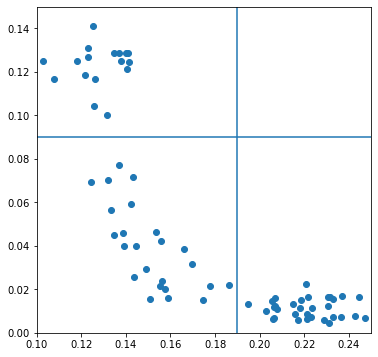

In [319]:
# define three groups of mutants 
plt.figure(figsize=(6,6))

plt.scatter(validations_df['hap_fc_average'], validations_df['hap_cy_average'])
plt.axhline(0.09)
plt.axvline(0.19)
plt.xlim(0.1,0.25)
plt.ylim(0,0.15)

In [872]:
index_to_cluster = {}

for index in list(validations_df.index):
    
    fc = validations_df.loc[index]['combined_hap_fc']
    cy = validations_df.loc[index]['combined_hap_cy']
    
    if fc > 0.2:
        
        index_to_cluster[index] = 'Nonsense-like'
        
    elif cy > 0.09:
        
        index_to_cluster[index] = 'WT-like'
        
        
    elif np.isnan(fc) == False and np.isnan(cy) == False:
        index_to_cluster[index] = 'Front minima'
        
    else:
        index_to_cluster[index] = 'nan'
        
index_to_cluster[1770] = 'Front minima'        

index_to_cluster

{136: 'nan',
 168: 'Nonsense-like',
 227: 'WT-like',
 261: 'Nonsense-like',
 263: 'Front minima',
 345: 'Nonsense-like',
 350: 'nan',
 416: 'Nonsense-like',
 418: 'Nonsense-like',
 429: 'Nonsense-like',
 439: 'Nonsense-like',
 455: 'WT-like',
 514: 'nan',
 567: 'Nonsense-like',
 574: 'Front minima',
 575: 'Nonsense-like',
 578: 'Front minima',
 582: 'WT-like',
 583: 'WT-like',
 645: 'Nonsense-like',
 681: 'Nonsense-like',
 723: 'nan',
 744: 'nan',
 745: 'Nonsense-like',
 766: 'Nonsense-like',
 770: 'Nonsense-like',
 773: 'Nonsense-like',
 787: 'WT-like',
 788: 'WT-like',
 1023: 'Nonsense-like',
 1161: 'nan',
 1170: 'Front minima',
 1205: 'WT-like',
 1206: 'Nonsense-like',
 1208: 'Nonsense-like',
 1213: 'Nonsense-like',
 1228: 'Nonsense-like',
 1236: 'Nonsense-like',
 1249: 'Front minima',
 1333: 'Nonsense-like',
 1350: 'WT-like',
 1391: 'WT-like',
 1410: 'Nonsense-like',
 1451: 'WT-like',
 1460: 'Nonsense-like',
 1527: 'WT-like',
 1551: 'WT-like',
 1560: 'Front minima',
 1563: 'Front m

In [873]:
validations_df['Mutation cluster'] = pd.Series(index_to_cluster)

In [874]:
validations_df

,codon,wt,measured,mtx1,mtx2,dmso1,dmso2,mtx_average,dmso_average,hap_fc_1,...,hap_fc_average,hap_cy_average,2nd_batch_FC,2nd_batch_CY,adjusted_2nd_batch_FC,adjusted_2nd_batch_CY,combined_hap_fc,combined_hap_cy,escape_outlier,Mutation cluster
136,8,S,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,nan
168,10,W,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.111533,0.002547,0.219011,0.016087,0.219011,0.016087,Yes,Nonsense-like
227,12,Q,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.049200,0.086733,0.126145,0.139102,0.126145,0.139102,Yes,WT-like
261,14,G,W,0.01380,0.01360,0.21628,0.21208,0.0137,0.21418,0.20784,...,0.20750,0.01094,NaN,NaN,NaN,NaN,0.207500,0.010940,No,Nonsense-like
263,14,G,Y,0.01388,0.01552,0.20184,0.20676,0.0147,0.20430,0.16984,...,0.16960,0.03144,NaN,NaN,NaN,NaN,0.169600,0.031440,No,Front minima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.100987,0.004160,0.203298,0.018444,0.203298,0.018444,Yes,Nonsense-like
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,0.14988,...,0.15884,0.01588,NaN,NaN,NaN,NaN,0.158840,0.015880,No,Front minima
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,0.16264,...,0.15546,0.02130,NaN,NaN,NaN,NaN,0.155460,0.021300,No,Front minima
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,0.21184,...,0.20648,0.01174,NaN,NaN,NaN,NaN,0.206480,0.011740,Yes,Nonsense-like


In [875]:
validations_df.at[1770, 'hap_cy_average'] = np.NaN
validations_df.at[1770, 'hap_cy_2'] =np.NaN
validations_df.at[1770, 'hap_fc_average'] = np.NaN
validations_df.at[1770, 'combined_hap_fc'] = np.NaN

In [876]:
colors=sns.color_palette("hls", 3)
mut_colors = {'WT-like':colors[1], 'Nonsense-like':colors[0], 'Front minima':colors[2], 'nan': 'grey'}

In [877]:
import scipy.stats as stats
import scipy

In [878]:
validations_df['combined_hap_fc'].dropna()

168     0.219011
227     0.126145
261     0.207500
263     0.169600
345     0.215940
          ...   
3233    0.203298
3249    0.158840
3250    0.155460
3274    0.206480
3275    0.212229
Name: combined_hap_fc, Length: 87, dtype: float64

In [879]:
def front(x,a,k):
    return (a)*(x**-k)

popt, pcov = scipy.optimize.curve_fit(front, validations_df['combined_hap_fc'].dropna(), validations_df['combined_hap_cy'].dropna())
popt, pcov 

(array([5.83708360e-05, 3.61403284e+00]),
 array([[ 1.39850775e-09, -1.16934537e-05],
        [-1.16934537e-05,  9.81427683e-02]]))

In [880]:
popt[1]

3.614032839660615

In [881]:
slope, inter, rval, pval, std_slope = stats.linregress(np.log2(validations_df['combined_hap_fc']).dropna(), 
                                                 np.log2(validations_df['combined_hap_cy']).dropna())

slope, inter, rval, pval, std_slope

#
#-3.817844107253432,
#-14.903689683943384,
#-0.8974029333606482,
#1.408361289807963e-26,
#0.22435148166769656
#
#

(-3.7282554404658197,
 -14.581044196792774,
 -0.8987001806446225,
 3.580326738457651e-32,
 0.19733944376666165)

In [882]:
from scipy.stats import t
tinv = lambda p, df: abs(t.ppf(p/2, df))
ts = tinv(0.05, len(validations_df['hap_fc_average'].dropna())-2)

In [883]:
print(f"slope (95%): {slope:.6f} +/- {ts*std_slope:.6f}")


slope (95%): -3.728255 +/- 0.393581


In [884]:
2**slope

0.07545417603178382

In [885]:
x_vals = validations_df['combined_hap_fc'].dropna()
y_vals = validations_df['combined_hap_cy'].dropna()


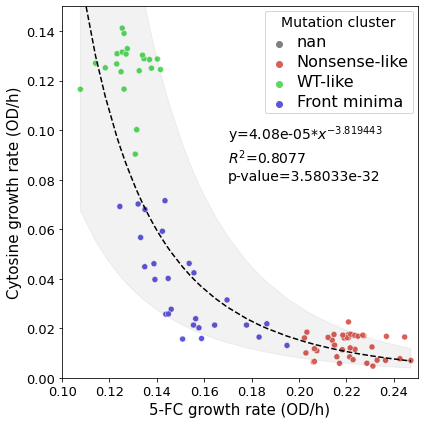

In [886]:
plt.figure(figsize=(6,6))

ax = sns.scatterplot(data=validations_df, x='combined_hap_fc', y='combined_hap_cy', hue='Mutation cluster',
            palette = mut_colors)

plt.xlim(0.10, 0.25)


plt.plot(sorted(list(x_vals)), front(sorted(list(x_vals)), *np.array([(2**-14.903357955515782), 3.819443356359812])), 'k--')


lower_y = front(sorted(list(x_vals)), *np.array([2**(-14.903357955515782), (3.819443356359812-(ts*std_slope))]))
upper_y = front(sorted(list(x_vals)), *np.array([2**(-14.903357955515782), (3.819443356359812+(ts*std_slope))]))
plt.fill_between(sorted(list(x_vals)), lower_y, upper_y, color='k', alpha=0.05)


plt.ylim(0,0.15)
plt.xlabel('5-FC growth rate (OD/h)', fontsize=15)
plt.ylabel('Cytosine growth rate (OD/h)', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.text(0.17, 0.08, 'y='+str(np.round(2**inter,8))+'$*x^{-3.819443}$' +'\n' +r'$R^{2}$='+str(np.round(rval**2, 4))+'\np-value='+str(np.format_float_scientific(pval,5)), fontsize=14)


plt.setp(ax.get_legend().get_texts(), fontsize='16') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14') # for legend title
plt.tight_layout()
plt.savefig('./linear_scale_validations.svg', format='svg', dpi=300)

In [887]:
plate_map = {'B1':3156, 'B2':3156, 'B3':3208, 'B4':3208, 'B5':3249, 'B6':3249, 'B7':3250, 'B8':3250, 'B9':3274, 'B10':3274, 'B11':3275, 'B12':3275,
             
             'D1':1915, 'D2':1915, 'D3':1921, 'D4':1921, 'D5':2298, 'D6':2298, 'D7':2445, 'D8':2445, 'D9':2534, 'D10':2534, 'D11':2536, 'D12':2536,
             
             'F1':745, 'F2':745, 'F3':788, 'F4':788, 'F5':1023, 'F6':1023, 'F7':1410, 'F8':1410, 'F9':1527, 'F10':1527, 'F11':1770, 'F12':1770,
             
             'H1':'4742', 'H2':'Sc_opt', 'H3':'Cn_opt', 'H4':'delta', 'H5':345, 'H6':345, 'H7':455, 'H8':455, 'H9':575, 'H10':575, 'H11':582, 'H12':582}

In [888]:
for x in ['A','C', 'E', 'G']:
    
    for y in range(1,13):
        
        pos = x+str(y)
        
        if x == 'A':
            plate_map[pos]= plate_map[('B'+str(y))]
            
        if x == 'C':
            plate_map[pos]= plate_map[('D'+str(y))]
    
        if x == 'E':
                plate_map[pos]= plate_map[('F'+str(y))]
                
        if x == 'G':
                plate_map[pos]= plate_map[('H'+str(y))]
#plate_map

In [889]:
plate_pos_to_index = {}

incr = 0

for x in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']:

    for y in range(1,13):
        
        pos = x+str(y)
        
        plate_pos_to_index[incr] = pos
        
        incr+=1
        
plate_pos_to_index

{0: 'A1',
 1: 'A2',
 2: 'A3',
 3: 'A4',
 4: 'A5',
 5: 'A6',
 6: 'A7',
 7: 'A8',
 8: 'A9',
 9: 'A10',
 10: 'A11',
 11: 'A12',
 12: 'B1',
 13: 'B2',
 14: 'B3',
 15: 'B4',
 16: 'B5',
 17: 'B6',
 18: 'B7',
 19: 'B8',
 20: 'B9',
 21: 'B10',
 22: 'B11',
 23: 'B12',
 24: 'C1',
 25: 'C2',
 26: 'C3',
 27: 'C4',
 28: 'C5',
 29: 'C6',
 30: 'C7',
 31: 'C8',
 32: 'C9',
 33: 'C10',
 34: 'C11',
 35: 'C12',
 36: 'D1',
 37: 'D2',
 38: 'D3',
 39: 'D4',
 40: 'D5',
 41: 'D6',
 42: 'D7',
 43: 'D8',
 44: 'D9',
 45: 'D10',
 46: 'D11',
 47: 'D12',
 48: 'E1',
 49: 'E2',
 50: 'E3',
 51: 'E4',
 52: 'E5',
 53: 'E6',
 54: 'E7',
 55: 'E8',
 56: 'E9',
 57: 'E10',
 58: 'E11',
 59: 'E12',
 60: 'F1',
 61: 'F2',
 62: 'F3',
 63: 'F4',
 64: 'F5',
 65: 'F6',
 66: 'F7',
 67: 'F8',
 68: 'F9',
 69: 'F10',
 70: 'F11',
 71: 'F12',
 72: 'G1',
 73: 'G2',
 74: 'G3',
 75: 'G4',
 76: 'G5',
 77: 'G6',
 78: 'G7',
 79: 'G8',
 80: 'G9',
 81: 'G10',
 82: 'G11',
 83: 'G12',
 84: 'H1',
 85: 'H2',
 86: 'H3',
 87: 'H4',
 88: 'H5',
 89: 'H6',

In [890]:
growth_curves_df = pd.DataFrame(index=range(0,96))

In [891]:
growth_curves_df['plate_pos'] = pd.Series(plate_pos_to_index)

growth_curves_df

,plate_pos
0,A1
1,A2
2,A3
3,A4
4,A5
...,...
91,H8
92,H9
93,H10
94,H11


In [892]:
index_to_gen = {}

for index in plate_pos_to_index.keys():
    
    gen = plate_map[plate_pos_to_index[index]]
    
    index_to_gen[index]=gen
    
growth_curves_df['mutant_index'] = pd.Series(index_to_gen)

growth_curves_df

,plate_pos,mutant_index
0,A1,3156
1,A2,3156
2,A3,3208
3,A4,3208
4,A5,3249
...,...,...
91,H8,455
92,H9,575
93,H10,575
94,H11,582


In [893]:
growth_curves_df[growth_curves_df['mutant_index']==2536] 

,plate_pos,mutant_index
34,C11,2536
35,C12,2536
46,D11,2536
47,D12,2536


In [894]:
index_to_seq = {}

for index in plate_pos_to_index.keys():
    
    pos = plate_pos_to_index[index]
    
    gen = index_to_gen[index]
    
    if type(gen) == str:
        
        if gen == '4742' or gen == 'Sc_opt':
            index_to_seq[index] = 'Sc'
        elif gen == 'Cn_opt':
            index_to_seq[index] = 'Cn'
        elif gen == 'delta':
            index_to_seq[index] = np.NaN
            
    else:
        
        col = int(pos[1:])
        
        if col % 2 == 0:
            
            index_to_seq[index] = 'Cn'
            
        else:
            
            index_to_seq[index] = 'Sc'
        
        
index_to_seq    

{0: 'Sc',
 1: 'Cn',
 2: 'Sc',
 3: 'Cn',
 4: 'Sc',
 5: 'Cn',
 6: 'Sc',
 7: 'Cn',
 8: 'Sc',
 9: 'Cn',
 10: 'Sc',
 11: 'Cn',
 12: 'Sc',
 13: 'Cn',
 14: 'Sc',
 15: 'Cn',
 16: 'Sc',
 17: 'Cn',
 18: 'Sc',
 19: 'Cn',
 20: 'Sc',
 21: 'Cn',
 22: 'Sc',
 23: 'Cn',
 24: 'Sc',
 25: 'Cn',
 26: 'Sc',
 27: 'Cn',
 28: 'Sc',
 29: 'Cn',
 30: 'Sc',
 31: 'Cn',
 32: 'Sc',
 33: 'Cn',
 34: 'Sc',
 35: 'Cn',
 36: 'Sc',
 37: 'Cn',
 38: 'Sc',
 39: 'Cn',
 40: 'Sc',
 41: 'Cn',
 42: 'Sc',
 43: 'Cn',
 44: 'Sc',
 45: 'Cn',
 46: 'Sc',
 47: 'Cn',
 48: 'Sc',
 49: 'Cn',
 50: 'Sc',
 51: 'Cn',
 52: 'Sc',
 53: 'Cn',
 54: 'Sc',
 55: 'Cn',
 56: 'Sc',
 57: 'Cn',
 58: 'Sc',
 59: 'Cn',
 60: 'Sc',
 61: 'Cn',
 62: 'Sc',
 63: 'Cn',
 64: 'Sc',
 65: 'Cn',
 66: 'Sc',
 67: 'Cn',
 68: 'Sc',
 69: 'Cn',
 70: 'Sc',
 71: 'Cn',
 72: 'Sc',
 73: 'Sc',
 74: 'Cn',
 75: nan,
 76: 'Sc',
 77: 'Cn',
 78: 'Sc',
 79: 'Cn',
 80: 'Sc',
 81: 'Cn',
 82: 'Sc',
 83: 'Cn',
 84: 'Sc',
 85: 'Sc',
 86: 'Cn',
 87: nan,
 88: 'Sc',
 89: 'Cn',
 90: 'Sc',
 91: 'Cn',


In [895]:
growth_curves_df['seq'] = pd.Series(index_to_seq)

growth_curves_df

,plate_pos,mutant_index,seq
0,A1,3156,Sc
1,A2,3156,Cn
2,A3,3208,Sc
3,A4,3208,Cn
4,A5,3249,Sc
...,...,...,...
91,H8,455,Cn
92,H9,575,Sc
93,H10,575,Cn
94,H11,582,Sc


In [896]:
index_to_rep = {}

for index in plate_pos_to_index.keys():
    
    pos = plate_pos_to_index[index]
    
    row = pos[0]
    
    if row in ['H', 'F', 'D', 'B']:
        
        index_to_rep[index] = 1
        
    elif row in ['G', 'E', 'C', 'A']:
        
        index_to_rep[index] = 2
        
#index_to_rep
    

In [897]:
growth_curves_df['rep'] = pd.Series(index_to_rep)

growth_curves_df

,plate_pos,mutant_index,seq,rep
0,A1,3156,Sc,2
1,A2,3156,Cn,2
2,A3,3208,Sc,2
3,A4,3208,Cn,2
4,A5,3249,Sc,2
...,...,...,...,...
91,H8,455,Cn,1
92,H9,575,Sc,1
93,H10,575,Cn,1
94,H11,582,Sc,1


In [898]:
FC_neo = pd.read_excel('./test_mutants_cneo_5FC.xlsx', header=0, nrows=96, index_col=0)
FC_neo

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,160220s,161120s,162021s,162921s,163821s,164721s,165621s,166521s,167421s,168321s
A1,0.088675,0.089050,0.089650,0.089850,0.090400,0.091350,0.092450,0.093600,0.095050,0.096600,...,0.96720,0.96698,0.96700,0.96680,0.96685,0.96693,0.96693,0.96695,0.96710,0.96697
A2,0.092825,0.093200,0.093325,0.093025,0.093400,0.094050,0.094700,0.095600,0.096675,0.097875,...,0.94538,0.94535,0.94530,0.94525,0.94548,0.94558,0.94520,0.94537,0.94545,0.94530
A3,0.091425,0.091875,0.092050,0.091925,0.092575,0.093100,0.094050,0.094900,0.096175,0.097650,...,0.94613,0.94598,0.94608,0.94575,0.94600,0.94590,0.94578,0.94588,0.94590,0.94602
A4,0.092200,0.092225,0.092275,0.092075,0.092500,0.093075,0.094025,0.095125,0.096475,0.098175,...,0.96600,0.96578,0.96610,0.96555,0.96593,0.96590,0.96572,0.96605,0.96565,0.96608
A5,0.090325,0.090625,0.091025,0.090875,0.091125,0.091650,0.092375,0.093375,0.094400,0.095775,...,0.96027,0.96020,0.96008,0.95985,0.96030,0.96025,0.96003,0.96023,0.95978,0.95995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,0.094700,0.095175,0.094675,0.094775,0.095400,0.096275,0.097150,0.098275,0.099975,0.101450,...,0.93893,0.93883,0.93855,0.93880,0.93893,0.93845,0.93858,0.93845,0.93823,0.93812
H9,0.093600,0.094225,0.093475,0.093325,0.093825,0.094500,0.095025,0.096400,0.097950,0.099900,...,0.96975,0.96955,0.96937,0.96990,0.96995,0.96940,0.96980,0.96928,0.96952,0.96962
H10,0.095100,0.096025,0.095400,0.095475,0.095975,0.096925,0.098150,0.100000,0.102080,0.104280,...,0.97140,0.97130,0.97113,0.97165,0.97155,0.97152,0.97160,0.97120,0.97170,0.97132
H11,0.095450,0.096575,0.096350,0.096550,0.097350,0.098025,0.099475,0.100600,0.102020,0.103230,...,0.94370,0.94348,0.94337,0.94398,0.94373,0.94340,0.94312,0.94332,0.94332,0.94320


In [899]:
rename_dict = {}


for col_name in FC_neo.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
FC_neo.rename(columns = rename_dict, inplace=True)
FC_neo=FC_neo.T

FC_neo.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0.00,0.088675,0.092825,0.091425,0.092200,0.090325,0.092050,0.092200,0.092650,0.091875,0.091775,...,0.094275,0.10348,0.098175,0.097150,0.095400,0.094700,0.093600,0.095100,0.095450,0.094000
0.25,0.089050,0.093200,0.091875,0.092225,0.090625,0.092550,0.092300,0.092475,0.091725,0.091725,...,0.094975,0.10527,0.099375,0.097675,0.096200,0.095175,0.094225,0.096025,0.096575,0.095200
0.50,0.089650,0.093325,0.092050,0.092275,0.091025,0.092175,0.091750,0.091850,0.091500,0.091125,...,0.094650,0.10552,0.099175,0.096775,0.095875,0.094675,0.093475,0.095400,0.096350,0.095050
0.75,0.089850,0.093025,0.091925,0.092075,0.090875,0.091825,0.091300,0.091775,0.091150,0.091075,...,0.094850,0.10640,0.099700,0.096850,0.096000,0.094775,0.093325,0.095475,0.096550,0.095450
1.00,0.090400,0.093400,0.092575,0.092500,0.091125,0.092075,0.091525,0.092025,0.091475,0.091350,...,0.095450,0.10785,0.100600,0.097275,0.096600,0.095400,0.093825,0.095975,0.097350,0.096175


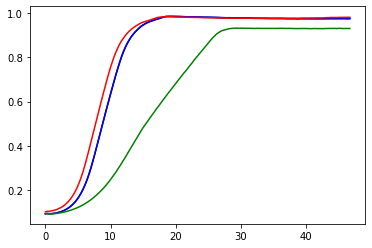

In [900]:
plt.plot(FC_neo['C11'], 'k')
plt.plot(FC_neo['D11'], 'b')

plt.plot(FC_neo['H1'], 'green')
plt.plot(FC_neo['H4'], 'red')

In [901]:
def get_derivative_growth_rate(well, df, tmax=40):
    
    df_cols = [ x for x in list(df.index) if x<=tmax]
    
    df_data = df.loc[df_cols]
    data = df_data[well]


    data_diff = data.diff()*4
    
    get_top_5 = data_diff.nlargest(5)
    
    growth_rate = np.median(get_top_5)
    std_err = np.std(get_top_5)
    
    return growth_rate, std_err

In [902]:
get_derivative_growth_rate('C11', FC_neo), get_derivative_growth_rate('D11', FC_neo)

((0.11452000000000018, 0.0010136981799331833),
 (0.1140000000000001, 0.0012400258061830932))

In [903]:
FC_growth_rates = {}

for index in plate_pos_to_index.keys():
    
    pos = plate_pos_to_index[index]
    
    FC_growth_rates[index] = get_derivative_growth_rate(pos, FC_neo)[0]
    
#FC_growth_rates

In [904]:
growth_curves_df['FC_growth'] = pd.Series(FC_growth_rates)

In [905]:
growth_curves_df

,plate_pos,mutant_index,seq,rep,FC_growth
0,A1,3156,Sc,2,0.09128
1,A2,3156,Cn,2,0.05440
2,A3,3208,Sc,2,0.06028
3,A4,3208,Cn,2,0.09340
4,A5,3249,Sc,2,0.07448
...,...,...,...,...,...
91,H8,455,Cn,1,0.05140
92,H9,575,Sc,1,0.11100
93,H10,575,Cn,1,0.11140
94,H11,582,Sc,1,0.05464


(array([35.4509359 , 11.81697863,  8.86273398, 11.81697863,  0.        ,
         0.        ,  7.38561165, 17.72546795,  7.38561165, 41.35942522]),
 array([0.04748 , 0.054532, 0.061584, 0.068636, 0.075688, 0.08274 ,
        0.089792, 0.096844, 0.103896, 0.110948, 0.118   ]),
 <BarContainer object of 10 artists>)

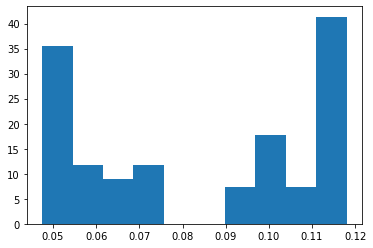

In [906]:
plt.hist(growth_curves_df['FC_growth'], density=True)

In [907]:
CY_neo = pd.read_excel('./test_mutants_cneo_CY.xlsx', header=0, nrows=96, index_col=0)
CY_neo

,0s,900s,1800s,2700s,3600s,4501s,5401s,6301s,7201s,8101s,...,160220s,161120s,162021s,162921s,163821s,164721s,165621s,166521s,167421s,168321s
A1,0.091275,0.090175,0.091025,0.091525,0.092375,0.093250,0.094300,0.095250,0.096125,0.097675,...,0.21455,0.21437,0.21537,0.21502,0.21680,0.21600,0.21670,0.21715,0.21790,0.21748
A2,0.093600,0.093675,0.094125,0.094250,0.094250,0.095225,0.096375,0.097475,0.098750,0.100120,...,0.92378,0.92445,0.92538,0.92615,0.92693,0.92758,0.92857,0.92932,0.92985,0.93078
A3,0.094475,0.094675,0.094550,0.094675,0.095125,0.095625,0.096375,0.097450,0.098650,0.099925,...,0.40658,0.40740,0.40940,0.41018,0.41125,0.41285,0.41468,0.41555,0.41750,0.41738
A4,0.094450,0.094350,0.094225,0.094375,0.094725,0.095500,0.096375,0.097225,0.098125,0.099225,...,0.23078,0.23140,0.23233,0.23270,0.23315,0.23370,0.23448,0.23465,0.23563,0.23552
A5,0.091075,0.091175,0.091150,0.091250,0.091500,0.092150,0.093100,0.093950,0.094750,0.095875,...,0.35140,0.35290,0.35578,0.35662,0.35815,0.36028,0.36235,0.36383,0.36555,0.36657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
H8,0.092475,0.093075,0.092400,0.092450,0.092575,0.093225,0.094575,0.095650,0.096625,0.098500,...,0.94817,0.94827,0.94903,0.94963,0.94980,0.95000,0.94978,0.94995,0.95050,0.95105
H9,0.088325,0.089475,0.088925,0.088875,0.088800,0.088925,0.089625,0.089825,0.089975,0.090625,...,0.15803,0.15808,0.15892,0.15895,0.15890,0.15955,0.15925,0.15885,0.15983,0.15973
H10,0.090100,0.090800,0.090175,0.090175,0.090300,0.090550,0.091450,0.091500,0.091975,0.092900,...,0.16378,0.16343,0.16400,0.16437,0.16442,0.16485,0.16440,0.16473,0.16503,0.16540
H11,0.088825,0.091975,0.094050,0.093975,0.094150,0.094450,0.095425,0.096250,0.096675,0.098575,...,0.94148,0.94140,0.94247,0.94248,0.94245,0.94285,0.94268,0.94293,0.94317,0.94417


In [908]:
rename_dict = {}


for col_name in CY_neo.columns:
    to_hours = np.float64(col_name.strip('s'))/(60*60)
    rename_dict[col_name] = to_hours
    
CY_neo.rename(columns = rename_dict, inplace=True)
CY_neo=CY_neo.T

CY_neo.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12
0.00,0.091275,0.093600,0.094475,0.094450,0.091075,0.091325,0.096025,0.091100,0.092375,0.091675,...,0.095775,0.10475,0.096450,0.092825,0.093425,0.092475,0.088325,0.090100,0.088825,0.089075
0.25,0.090175,0.093675,0.094675,0.094350,0.091175,0.091850,0.095350,0.091450,0.093425,0.091900,...,0.097825,0.10585,0.097350,0.094025,0.094450,0.093075,0.089475,0.090800,0.091975,0.090175
0.50,0.091025,0.094125,0.094550,0.094225,0.091150,0.091600,0.094175,0.091375,0.092200,0.091050,...,0.097600,0.10523,0.096775,0.093200,0.094175,0.092400,0.088925,0.090175,0.094050,0.089650
0.75,0.091525,0.094250,0.094675,0.094375,0.091250,0.091425,0.093950,0.091350,0.092100,0.090050,...,0.099000,0.10530,0.096800,0.093200,0.094475,0.092450,0.088875,0.090175,0.093975,0.089750
1.00,0.092375,0.094250,0.095125,0.094725,0.091500,0.092000,0.094275,0.091825,0.092725,0.090800,...,0.099825,0.10588,0.097150,0.093150,0.094800,0.092575,0.088800,0.090300,0.094150,0.091350


In [909]:
CY_growth_rates = {}

for index in plate_pos_to_index.keys():
    
    pos = plate_pos_to_index[index]
    
    CY_growth_rates[index] = get_derivative_growth_rate(pos, CY_neo)[0]
    
#CY_growth_rates


In [910]:
growth_curves_df['CY_growth'] = pd.Series(CY_growth_rates)

In [911]:
growth_curves_df.tail(20)

,plate_pos,mutant_index,seq,rep,FC_growth,CY_growth
76,G5,345,Sc,2,0.11092,0.00644
77,G6,345,Cn,2,0.11212,0.00760
78,G7,455,Sc,2,0.04912,0.10116
79,G8,455,Cn,2,0.04988,0.08488
80,G9,575,Sc,2,0.11092,0.00688
81,G10,575,Cn,2,0.11220,0.00730
82,G11,582,Sc,2,0.05328,0.08072
83,G12,582,Cn,2,0.04848,0.08772
84,H1,4742,Sc,1,0.04992,0.09660
85,H2,Sc_opt,Sc,1,0.04748,0.10004


In [912]:
## reorganize DF to make intergration of previous validation data easier

mutant_dict_of_dict ={}

for mutant_index in growth_curves_df['mutant_index'].unique():
    
    mutant_dict = {}
    
    mutant_data = growth_curves_df[growth_curves_df['mutant_index']==mutant_index]
    
    #print(mutant_data)
    
    if type(mutant_index) == int:
    
        mutant_dict['Sc_FC_1'] = np.float64(mutant_data[(mutant_data['seq'] == 'Sc')&(mutant_data['rep']==1)]['FC_growth'])
        mutant_dict['Sc_FC_2'] = np.float64(mutant_data[(mutant_data['seq'] == 'Sc')&(mutant_data['rep']==2)]['FC_growth'])
        mutant_dict['Cn_FC_1'] = np.float64(mutant_data[(mutant_data['seq'] == 'Cn')&(mutant_data['rep']==1)]['FC_growth'])
        mutant_dict['Cn_FC_2'] = np.float64(mutant_data[(mutant_data['seq'] == 'Cn')&(mutant_data['rep']==2)]['FC_growth'])
        
        mutant_dict['Sc_CY_1'] = np.float64(mutant_data[(mutant_data['seq'] == 'Sc')&(mutant_data['rep']==1)]['CY_growth'])
        mutant_dict['Sc_CY_2'] = np.float64(mutant_data[(mutant_data['seq'] == 'Sc')&(mutant_data['rep']==2)]['CY_growth'])
        mutant_dict['Cn_CY_1'] = np.float64(mutant_data[(mutant_data['seq'] == 'Cn')&(mutant_data['rep']==1)]['CY_growth'])
        mutant_dict['Cn_CY_2'] = np.float64(mutant_data[(mutant_data['seq'] == 'Cn')&(mutant_data['rep']==2)]['CY_growth'])
        
        mutant_dict_of_dict[mutant_index] = mutant_dict
        
        
#print(mutant_dict_of_dict)

In [913]:
opt_seq_dict = {}

sc_opt_data = growth_curves_df[growth_curves_df['mutant_index']=='Sc_opt']
cn_opt_data = growth_curves_df[growth_curves_df['mutant_index']=='Cn_opt']


opt_seq_dict['Sc_FC_1'] = np.float64(sc_opt_data[(sc_opt_data['seq'] == 'Sc')&(sc_opt_data['rep']==1)]['FC_growth'])
opt_seq_dict['Sc_FC_2'] = np.float64(sc_opt_data[(sc_opt_data['seq'] == 'Sc')&(sc_opt_data['rep']==2)]['FC_growth'])
opt_seq_dict['Cn_FC_1'] = np.float64(cn_opt_data[(cn_opt_data['seq'] == 'Cn')&(cn_opt_data['rep']==1)]['FC_growth'])
opt_seq_dict['Cn_FC_2'] = np.float64(cn_opt_data[(cn_opt_data['seq'] == 'Cn')&(cn_opt_data['rep']==2)]['FC_growth'])

opt_seq_dict['Sc_CY_1'] = np.float64(sc_opt_data[(sc_opt_data['seq'] == 'Sc')&(sc_opt_data['rep']==1)]['CY_growth'])
opt_seq_dict['Sc_CY_2'] = np.float64(sc_opt_data[(sc_opt_data['seq'] == 'Sc')&(sc_opt_data['rep']==2)]['CY_growth'])
opt_seq_dict['Cn_CY_1'] = np.float64(cn_opt_data[(cn_opt_data['seq'] == 'Cn')&(cn_opt_data['rep']==1)]['CY_growth'])
opt_seq_dict['Cn_CY_2'] = np.float64(cn_opt_data[(cn_opt_data['seq'] == 'Cn')&(cn_opt_data['rep']==2)]['CY_growth'])

mutant_dict_of_dict['opt'] = opt_seq_dict

In [914]:
wt_seq_dict = {}

wt_data = growth_curves_df[growth_curves_df['mutant_index']=='4742']

wt_seq_dict['Sc_FC_1'] = np.float64(wt_data[(wt_data['seq'] == 'Sc')&(wt_data['rep']==1)]['FC_growth'])
wt_seq_dict['Sc_FC_2'] = np.float64(wt_data[(wt_data['seq'] == 'Sc')&(wt_data['rep']==2)]['FC_growth'])
wt_seq_dict['Cn_FC_1'] = np.NaN
wt_seq_dict['Cn_FC_2'] = np.NaN

wt_seq_dict['Sc_CY_1'] = np.float64(wt_data[(wt_data['seq'] == 'Sc')&(wt_data['rep']==1)]['CY_growth'])
wt_seq_dict['Sc_CY_2'] = np.float64(wt_data[(wt_data['seq'] == 'Sc')&(wt_data['rep']==2)]['CY_growth'])
wt_seq_dict['Cn_CY_1'] = np.NaN
wt_seq_dict['Cn_CY_2'] = np.NaN

mutant_dict_of_dict['4742'] = wt_seq_dict

In [915]:
delta_seq_dict = {}

delta_data = growth_curves_df[growth_curves_df['mutant_index']=='delta']

delta_seq_dict['Sc_FC_1'] = np.float64(delta_data[(delta_data['rep']==1)]['FC_growth'])
delta_seq_dict['Sc_FC_2'] = np.float64(delta_data[(delta_data['rep']==2)]['FC_growth'])
delta_seq_dict['Cn_FC_1'] = np.NaN
delta_seq_dict['Cn_FC_2'] = np.NaN

delta_seq_dict['Sc_CY_1'] = np.float64(delta_data[(delta_data['rep']==1)]['CY_growth'])
delta_seq_dict['Sc_CY_2'] = np.float64(delta_data[(delta_data['rep']==2)]['CY_growth'])
delta_seq_dict['Cn_CY_1'] = np.NaN
delta_seq_dict['Cn_CY_2'] = np.NaN

mutant_dict_of_dict['delta'] = delta_seq_dict

In [916]:
data_df = pd.DataFrame.from_dict(mutant_dict_of_dict).T

data_df

,Sc_FC_1,Sc_FC_2,Cn_FC_1,Cn_FC_2,Sc_CY_1,Sc_CY_2,Cn_CY_1,Cn_CY_2
3156,0.08988,0.09128,0.05480,0.05440,0.00680,0.00788,0.06372,0.06244
3208,0.06080,0.06028,0.09344,0.09340,0.01012,0.01040,0.00740,0.00600
3249,0.07360,0.07448,0.06992,0.07092,0.00904,0.00988,0.02112,0.02116
3250,0.06440,0.06316,0.06692,0.06668,0.02288,0.02160,0.02660,0.02448
3274,0.11120,0.10952,0.09692,0.09780,0.00592,0.00532,0.00530,0.00580
3275,0.11248,0.11240,0.10164,0.10180,0.00772,0.00920,0.00668,0.00632
1915,0.05352,0.05420,0.10988,0.11152,0.07772,0.07952,0.00472,0.00508
1921,0.07104,0.07240,0.10368,0.10368,0.01380,0.01400,0.00560,0.00540
2298,0.11288,0.11452,0.11468,0.11440,0.00440,0.00432,0.00572,0.00540
2445,0.11332,0.11348,0.05148,0.05232,0.00564,0.00612,0.01184,0.01204


In [917]:
len(data_df)

25

In [918]:
mut_type = {}

for index in data_df.index:
    
    if type(index)==int:
    
        mut_type[index] = index_to_cluster[index]
        
    elif index == 'opt' or index == '4742':
        
        mut_type[index] = 'WT-like'
        
    elif index == 'delta':
        
        mut_type[index] = 'Nonsense-like'
    
data_df['Mutation cluster'] = pd.Series(mut_type)

In [919]:
data_df

,Sc_FC_1,Sc_FC_2,Cn_FC_1,Cn_FC_2,Sc_CY_1,Sc_CY_2,Cn_CY_1,Cn_CY_2,Mutation cluster
3156,0.08988,0.09128,0.05480,0.05440,0.00680,0.00788,0.06372,0.06244,Front minima
3208,0.06080,0.06028,0.09344,0.09340,0.01012,0.01040,0.00740,0.00600,Front minima
3249,0.07360,0.07448,0.06992,0.07092,0.00904,0.00988,0.02112,0.02116,Front minima
3250,0.06440,0.06316,0.06692,0.06668,0.02288,0.02160,0.02660,0.02448,Front minima
3274,0.11120,0.10952,0.09692,0.09780,0.00592,0.00532,0.00530,0.00580,Nonsense-like
3275,0.11248,0.11240,0.10164,0.10180,0.00772,0.00920,0.00668,0.00632,Nonsense-like
1915,0.05352,0.05420,0.10988,0.11152,0.07772,0.07952,0.00472,0.00508,Front minima
1921,0.07104,0.07240,0.10368,0.10368,0.01380,0.01400,0.00560,0.00540,Front minima
2298,0.11288,0.11452,0.11468,0.11440,0.00440,0.00432,0.00572,0.00540,Nonsense-like
2445,0.11332,0.11348,0.05148,0.05232,0.00564,0.00612,0.01184,0.01204,Nonsense-like


In [920]:
import seaborn as sns

(0.0, 0.12)

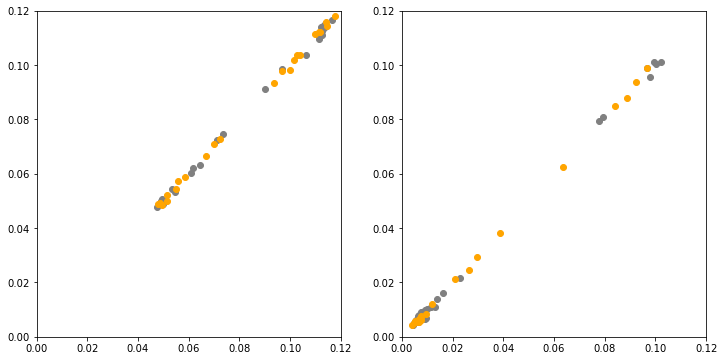

In [921]:
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(data_df['Sc_FC_1'], data_df['Sc_FC_2'], color='grey')
plt.scatter(data_df['Cn_FC_1'], data_df['Cn_FC_2'], color='orange')
plt.xlim(0,0.12)
plt.ylim(0,0.12)


plt.subplot(122)
plt.scatter(data_df['Sc_CY_1'], data_df['Sc_CY_2'], color='grey')
plt.scatter(data_df['Cn_CY_1'], data_df['Cn_CY_2'], color='orange')

plt.xlim(0,0.12)
plt.ylim(0,0.12)

In [922]:
data_df['Sc_FC_average'] = (data_df['Sc_FC_1']+data_df['Sc_FC_2'])/2
data_df['Cn_FC_average'] = (data_df['Cn_FC_1']+data_df['Cn_FC_2'])/2

data_df['Sc_CY_average'] = (data_df['Sc_CY_1']+data_df['Sc_CY_2'])/2
data_df['Cn_CY_average'] = (data_df['Cn_CY_1']+data_df['Cn_CY_2'])/2

(0.0, 0.11)

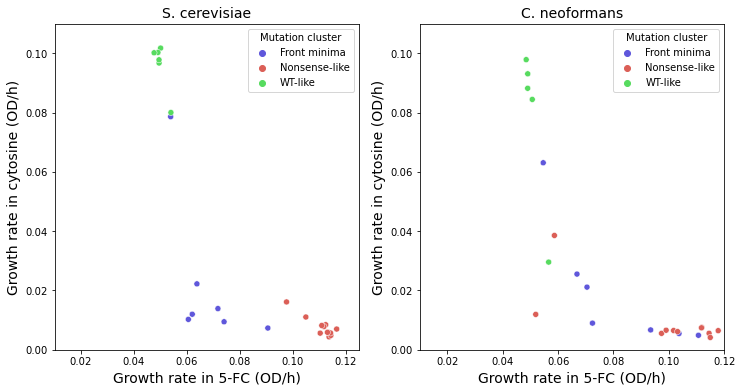

In [923]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.scatterplot(data = data_df, x='Sc_FC_average', y='Sc_CY_average', hue='Mutation cluster', palette=mut_colors)
plt.xlim(0.01,0.125)
plt.ylim(0,0.11)

plt.xlabel('Growth rate in 5-FC (OD/h)', fontsize=14)
plt.ylabel('Growth rate in cytosine (OD/h)', fontsize=14)
plt.title('S. cerevisiae', fontsize=14)


plt.subplot(122)
sns.scatterplot(data = data_df, x='Cn_FC_average', y='Cn_CY_average', hue='Mutation cluster', palette=mut_colors)

plt.xlabel('Growth rate in 5-FC (OD/h)', fontsize=14)
plt.ylabel('Growth rate in cytosine (OD/h)', fontsize=14)
plt.title('C. neoformans', fontsize=14)


plt.xlim(0.01,0.12)
plt.ylim(0,0.11)

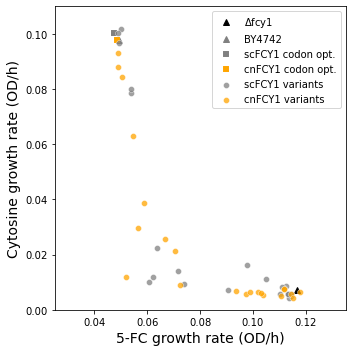

In [924]:
plt.figure(figsize=(5,5))


plt.plot(data_df.loc['delta']["Sc_FC_average"], data_df.loc['delta']["Sc_CY_average"], marker='^', color='k', markeredgecolor='k',markeredgewidth=1, zorder=2, linestyle='none')
plt.plot(data_df.loc['4742']["Sc_FC_average"], data_df.loc['4742']["Sc_CY_average"], marker='^', color='grey', markeredgecolor='grey',markeredgewidth=1, zorder=2, linestyle='none')

plt.plot(data_df.loc['opt']["Sc_FC_average"], data_df.loc['opt']["Sc_CY_average"], marker='s', color='grey', markeredgecolor='w',markeredgewidth=0.05, zorder=3, linestyle='none')
sns.scatterplot(data = variants, x='Sc_FC_average', y='Sc_CY_average', color='grey', marker='o', legend=None, zorder=4, alpha=0.75)

plt.plot(data_df.loc['opt']["Cn_FC_average"], data_df.loc['opt']["Cn_CY_average"], marker='s', color='orange', markeredgecolor='w',markeredgewidth=0.05, zorder=3, linestyle='none')
sns.scatterplot(data = variants, x='Cn_FC_average', y='Cn_CY_average', color='orange', marker='o', legend =None, zorder=5, alpha=0.75)




plt.legend(['$\Delta$fcy1', 'BY4742', 'scFCY1 codon opt.', 'cnFCY1 codon opt.', 'scFCY1 variants', 'cnFCY1 variants'])

plt.ylim(0,0.11)
plt.xlim(0.025,0.135)

plt.xlabel('5-FC growth rate (OD/h)', fontsize=14)
plt.ylabel('Cytosine growth rate (OD/h)', fontsize=14)

plt.tight_layout()
plt.savefig('./figure_6_panel_C.svg', format='svg', dpi=300)

In [925]:
stats.ks_2samp(variants['Sc_CY_average'], variants['Cn_CY_average'])


KstestResult(statistic=0.22727272727272727, pvalue=0.6323860678195116)

In [926]:
stats.ks_2samp(variants['Sc_FC_average'], variants['Cn_FC_average'])

KstestResult(statistic=0.18181818181818182, pvalue=0.8716786642836207)

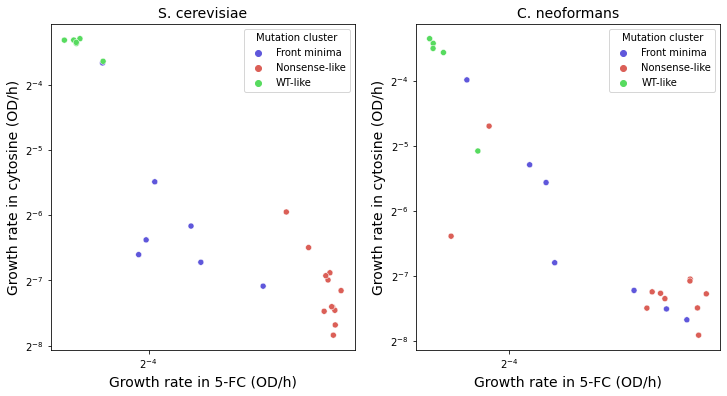

In [927]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.scatterplot(data = data_df, x='Sc_FC_average', y='Sc_CY_average', hue='Mutation cluster', palette=mut_colors)


plt.xlabel('Growth rate in 5-FC (OD/h)', fontsize=14)
plt.ylabel('Growth rate in cytosine (OD/h)', fontsize=14)
plt.title('S. cerevisiae', fontsize=14)
plt.xscale('log', base=2)
plt.yscale('log', base=2)



plt.subplot(122)
sns.scatterplot(data = data_df, x='Cn_FC_average', y='Cn_CY_average', hue='Mutation cluster', palette=mut_colors)

plt.xlabel('Growth rate in 5-FC (OD/h)', fontsize=14)
plt.ylabel('Growth rate in cytosine (OD/h)', fontsize=14)
plt.title('C. neoformans', fontsize=14)
plt.xscale('log', base=2)
plt.yscale('log', base=2)



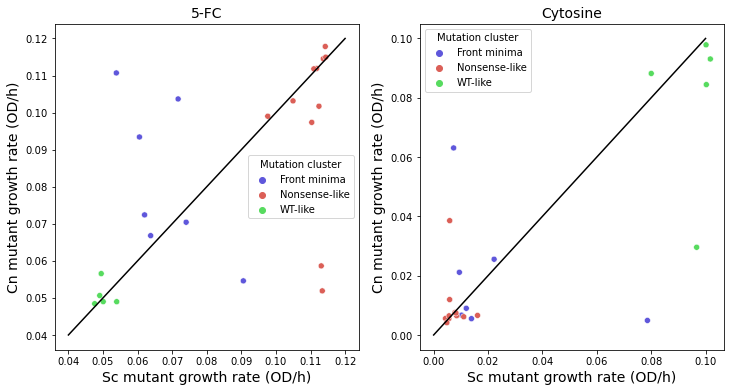

In [928]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.scatterplot(data = data_df, x='Sc_FC_average', y='Cn_FC_average', hue='Mutation cluster', palette=mut_colors)


plt.xlabel('Sc mutant growth rate (OD/h)', fontsize=14)
plt.ylabel('Cn mutant growth rate (OD/h)', fontsize=14)
plt.title('5-FC', fontsize=14)
plt.plot([0.04,0.12], [0.04,0.12], 'k-')

plt.subplot(122)
sns.scatterplot(data = data_df, x='Sc_CY_average', y='Cn_CY_average', hue='Mutation cluster', palette=mut_colors)

plt.xlabel('Sc mutant growth rate (OD/h)', fontsize=14)
plt.ylabel('Cn mutant growth rate (OD/h)', fontsize=14)
plt.title('Cytosine', fontsize=14)

plt.plot([0,0.10], [0,0.10], 'k-')



In [929]:
different_muts_fc = list(data_df[abs(data_df['Cn_FC_average']-data_df['Sc_FC_average'])>0.03].index)

In [930]:
dms_df.loc[different_muts_fc]

,codon,wt,measured,CY_1,CY_1_R1,CY_1_MAD_1,CY_1_R2,CY_1_MAD_2,FC_1,FC_1_R1,...,interface,ddG_struc_HET,ddG_struc_HM,ddG_inter_HET,ddG_inter_HM,r4s_score,RSA,temp,ortholog_aa_freq,dist_act_site
3156,152,W,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,2.10439,4.24430,0.00914,-0.01786,-1.0220,0.045455,13.281786,0.000000,2.928607
3208,154,E,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.77123,2.78972,1.08180,2.20058,-0.9265,0.091121,10.023333,0.000000,1.329213
1915,93,M,L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,0.02557,-0.01709,0.09616,0.25000,-1.0161,0.004926,7.386875,0.042654,1.320638
1921,93,M,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.00,1.47363,14.57522,0.70640,13.58276,-1.0161,0.004926,7.386875,0.000000,1.320638
2445,118,G,W,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.75,51.61766,109.98640,5.37362,11.40796,-0.0095,0.000000,7.626250,0.000000,4.902347
1023,50,H,Q,-0.41597,-0.55409,1.786444,-0.27785,1.683284,1.115794,1.288931,...,0.00,1.50246,4.18506,0.06866,0.05134,-0.7959,0.060185,11.012500,0.000000,1.311600


In [931]:
cn_ddg_df.columns

Index(['Chain', 'WT_res', 'Position', 'Mut_res', 'Mean_ddG_stab_HET',
       'Mean_ddG_stab_HM', 'Mean_ddG_int_HET', 'Mean_ddG_int_HM'],
      dtype='object')

In [932]:
data_df['ddG_struc_HM'] = dms_df['ddG_struc_HM']
data_df['ddG_inter_HM'] = dms_df['ddG_inter_HM']

In [933]:
sc_position_dict = {}
sc_wt_dict = {}

cn_position_dict = {}
cn_wt_dict = {}

cn_ddg_struc_HM_dict = {}
cn_ddg_inter_HM_dict = {}

for index in [x for x in list(data_df.index) if x not in ['opt', 'delta', '4742']]:
    mut = dms_df.loc[index]
    
    codon = int(mut['codon'])
    wt = str(mut['wt'])
    measured = str(mut['measured'])
    
    codon_align_pos = cer_pos_to_align_pos[codon]
    
    crypto_neo_codon = align_pos_to_neo_pos[codon_align_pos]
    
    cn_ddg_struc_HM = float(cn_ddg_df[(cn_ddg_df['Position'] == crypto_neo_codon)&(cn_ddg_df['Mut_res'] == measured)]['Mean_ddG_stab_HM'])
    cn_ddg_inter_HM = float(cn_ddg_df[(cn_ddg_df['Position'] == crypto_neo_codon)&(cn_ddg_df['Mut_res'] == measured)]['Mean_ddG_int_HM'])
    
    cn_wt_res = str(cn_ddg_df[(cn_ddg_df['Position'] == crypto_neo_codon)&(cn_ddg_df['Mut_res'] == measured)]['WT_res']).split('\n')[0][-1]
    #print(cn_wt_res)
    
    sc_position_dict[index] = int(codon)
    sc_wt_dict[index] = wt
    
    cn_position_dict[index] = int(crypto_neo_codon)
    cn_wt_dict[index] = str(cn_wt_res)
    
    cn_ddg_struc_HM_dict[index] = cn_ddg_struc_HM
    cn_ddg_inter_HM_dict[index] = cn_ddg_inter_HM
    

In [934]:
data_df['sc_pos'] = pd.Series(sc_position_dict)
data_df['sc_wt'] = pd.Series(sc_wt_dict)

data_df['cn_pos'] = pd.Series(cn_position_dict)
data_df['cn_wt'] = pd.Series(cn_wt_dict)

data_df['cn_ddG_struc_HM'] = pd.Series(cn_ddg_struc_HM_dict)
data_df['cn_ddG_inter_HM'] = pd.Series(cn_ddg_inter_HM_dict)

In [935]:
data_df['diff_sc_fc'] = data_df['Sc_FC_average'] - data_df['Cn_FC_average']
data_df['diff_sc_cy'] = data_df['Sc_CY_average'] - data_df['Cn_CY_average']


In [936]:
data_df.columns

Index(['Sc_FC_1', 'Sc_FC_2', 'Cn_FC_1', 'Cn_FC_2', 'Sc_CY_1', 'Sc_CY_2',
       'Cn_CY_1', 'Cn_CY_2', 'Mutation cluster', 'Sc_FC_average',
       'Cn_FC_average', 'Sc_CY_average', 'Cn_CY_average', 'ddG_struc_HM',
       'ddG_inter_HM', 'sc_pos', 'sc_wt', 'cn_pos', 'cn_wt', 'cn_ddG_struc_HM',
       'cn_ddG_inter_HM', 'diff_sc_fc', 'diff_sc_cy'],
      dtype='object')

In [937]:
data_df.loc[different_muts_fc][['sc_pos', 'sc_wt','Sc_FC_average', 'Cn_FC_average', 'ddG_struc_HM', 'ddG_inter_HM', 'cn_ddG_struc_HM', 'cn_ddG_inter_HM', 'diff_sc_fc', 'diff_sc_cy']]

,sc_pos,sc_wt,Sc_FC_average,Cn_FC_average,ddG_struc_HM,ddG_inter_HM,cn_ddG_struc_HM,cn_ddG_inter_HM,diff_sc_fc,diff_sc_cy
3156,152.0,W,0.09058,0.05460,4.24430,-0.01786,3.31410,-0.04510,0.03598,-0.05574
3208,154.0,E,0.06054,0.09342,2.78972,2.20058,4.43308,1.60894,-0.03288,0.00356
1915,93.0,M,0.05386,0.11070,-0.01709,0.25000,3.26462,2.31114,-0.05684,0.07372
1921,93.0,M,0.07172,0.10368,14.57522,13.58276,18.40224,9.49704,-0.03196,0.00840
2445,118.0,G,0.11340,0.05190,109.98640,11.40796,42.55434,2.79190,0.06150,-0.00606
1023,50.0,H,0.11310,0.05864,4.18506,0.05134,2.76894,0.15534,0.05446,-0.03266


In [938]:
data_df['diff_sc'] = data_df['Sc_FC_average'] - data_df['Cn_FC_average']


(array([ 1.,  0.,  2.,  1., 12.,  4.,  0.,  1.,  0.,  2.]),
 array([-0.05684 , -0.045006, -0.033172, -0.021338, -0.009504,  0.00233 ,
         0.014164,  0.025998,  0.037832,  0.049666,  0.0615  ]),
 <BarContainer object of 10 artists>)

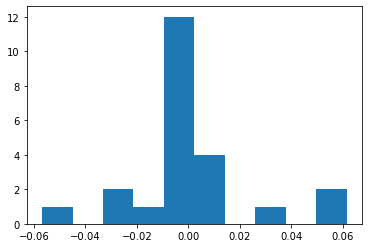

In [939]:
plt.hist(data_df['diff_sc_fc'])

(array([ 1.,  1.,  0.,  3., 14.,  2.,  0.,  0.,  0.,  2.]),
 array([-0.05574 , -0.042794, -0.029848, -0.016902, -0.003956,  0.00899 ,
         0.021936,  0.034882,  0.047828,  0.060774,  0.07372 ]),
 <BarContainer object of 10 artists>)

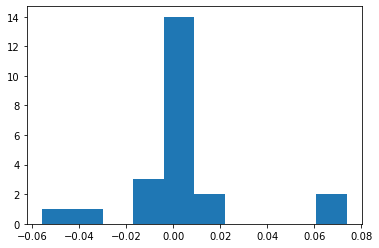

In [940]:
plt.hist(data_df['diff_sc_cy'])

In [941]:
data_df[abs(data_df['diff_sc_cy'])>0.03]

,Sc_FC_1,Sc_FC_2,Cn_FC_1,Cn_FC_2,Sc_CY_1,Sc_CY_2,Cn_CY_1,Cn_CY_2,Mutation cluster,Sc_FC_average,...,ddG_inter_HM,sc_pos,sc_wt,cn_pos,cn_wt,cn_ddG_struc_HM,cn_ddG_inter_HM,diff_sc_fc,diff_sc_cy,diff_sc
3156,0.08988,0.09128,0.05480,0.05440,0.00680,0.00788,0.06372,0.06244,Front minima,0.09058,...,-0.01786,152.0,W,155.0,W,3.31410,-0.04510,0.03598,-0.05574,0.03598
1915,0.05352,0.05420,0.10988,0.11152,0.07772,0.07952,0.00472,0.00508,Front minima,0.05386,...,0.25000,93.0,M,96.0,M,3.26462,2.31114,-0.05684,0.07372,-0.05684
788,0.04908,0.04988,0.05572,0.05740,0.09792,0.09552,0.02968,0.02948,WT-like,0.04948,...,-0.01044,39.0,N,42.0,H,-2.49334,0.02336,-0.00708,0.06714,-0.00708
1023,0.11232,0.11388,0.05840,0.05888,0.00628,0.00552,0.03888,0.03824,Nonsense-like,0.11310,...,0.05134,50.0,H,53.0,H,2.76894,0.15534,0.05446,-0.03266,0.05446


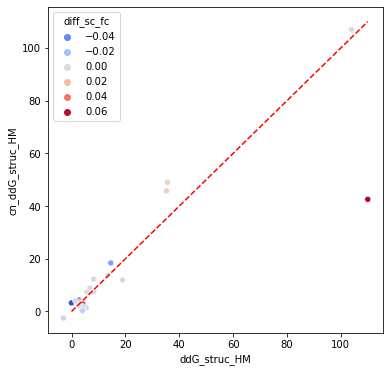

In [942]:
plt.figure(figsize=(6,6))
sns.scatterplot(data = data_df, x= 'ddG_struc_HM', y='cn_ddG_struc_HM', hue='diff_sc_fc', palette='coolwarm')
plt.plot([0,110], [0,110], 'r--')

In [943]:
variants = data_df.loc[[x for x in list(data_df.index) if x not in ['4742', 'opt', 'delta']]]


Text(0, 0.5, 'Change in cytosine growth rate')

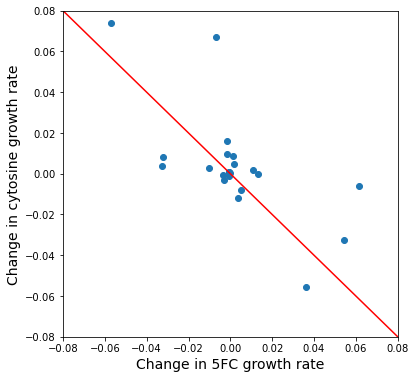

In [944]:
plt.figure(figsize=(6,6))

plt.scatter(variants['diff_sc_fc'], variants['diff_sc_cy'])

plt.xlim(-0.08,0.08)
plt.ylim(-0.08,0.08)

plt.plot([-0.08,0.08], [0.08,-0.08], 'r-')

plt.xlabel('Change in 5FC growth rate', fontsize=14)
plt.ylabel('Change in cytosine growth rate', fontsize=14)

In [945]:
variants.columns

Index(['Sc_FC_1', 'Sc_FC_2', 'Cn_FC_1', 'Cn_FC_2', 'Sc_CY_1', 'Sc_CY_2',
       'Cn_CY_1', 'Cn_CY_2', 'Mutation cluster', 'Sc_FC_average',
       'Cn_FC_average', 'Sc_CY_average', 'Cn_CY_average', 'ddG_struc_HM',
       'ddG_inter_HM', 'sc_pos', 'sc_wt', 'cn_pos', 'cn_wt', 'cn_ddG_struc_HM',
       'cn_ddG_inter_HM', 'diff_sc_fc', 'diff_sc_cy', 'diff_sc'],
      dtype='object')

In [946]:
sites_list

[345,
 575,
 582,
 745,
 1023,
 1410,
 1770,
 1778,
 1830,
 1854,
 1877,
 1915,
 1921,
 2298,
 2445,
 2467,
 2534,
 2536,
 3156,
 3208,
 3249,
 3250,
 3274,
 3275,
 455,
 787,
 788,
 1527,
 2967]

In [976]:
list(variants.index)

[3156,
 3208,
 3249,
 3250,
 3274,
 3275,
 1915,
 1921,
 2298,
 2445,
 2534,
 2536,
 745,
 788,
 1023,
 1410,
 1527,
 1770,
 345,
 455,
 575,
 582]

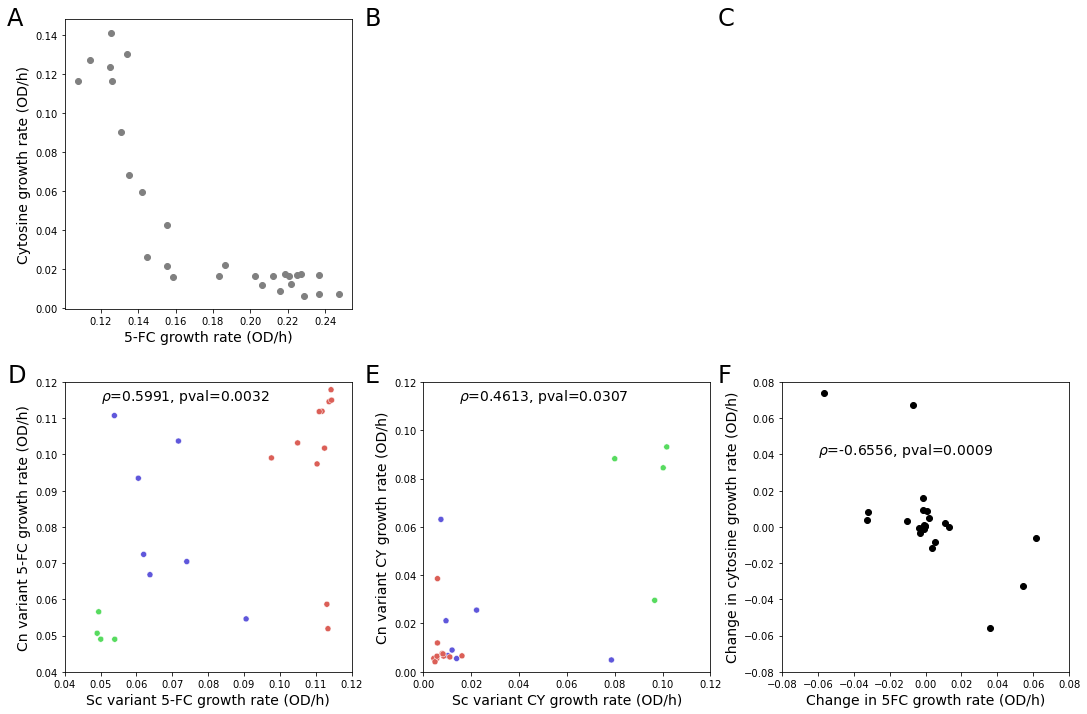

In [978]:
plt.figure(figsize=(18,12))

plt.subplots_adjust(wspace=0.25, hspace=0.25)

ax1 = plt.subplot(231)

plt.scatter(validations_df.loc[sites_list]['combined_hap_fc'], validations_df.loc[sites_list]['combined_hap_cy'], color='grey')

plt.xlabel('5-FC growth rate (OD/h)', fontsize=14)
plt.ylabel('Cytosine growth rate (OD/h)', fontsize=14)

plt.subplot(234)

sns.scatterplot(data = variants, x='Sc_FC_average', y='Cn_FC_average', hue='Mutation cluster', palette=mut_colors, legend=None)

plt.xlabel('Sc variant 5-FC growth rate (OD/h)', fontsize=14)
plt.ylabel('Cn variant 5-FC growth rate (OD/h)', fontsize=14)

rho, pval = stats.spearmanr(variants['Sc_FC_average'], variants['Cn_FC_average'])
stat_line = r'$\rho$='+str(np.round(rho,4))+', pval='+str(round(pval, 4))
plt.text(0.05,0.115, stat_line, fontsize=14)

plt.xlim(0.04, 0.12)
plt.ylim(0.04, 0.12)


plt.subplot(235)

sns.scatterplot(data = variants, x='Sc_CY_average', y='Cn_CY_average', hue='Mutation cluster', palette=mut_colors, legend=None)

plt.xlabel('Sc variant CY growth rate (OD/h)', fontsize=14)
plt.ylabel('Cn variant CY growth rate (OD/h)', fontsize=14)

rho, pval = stats.spearmanr(variants['Sc_CY_average'], variants['Cn_CY_average'])
stat_line = r'$\rho$='+str(np.round(rho,4))+', pval='+str(round(pval, 4))
plt.text(0.015,0.1125, stat_line, fontsize=14)

plt.xlim(0.00, 0.12)
plt.ylim(0.00, 0.12)

plt.subplot(236)


plt.scatter(variants['diff_sc_fc'], variants['diff_sc_cy'], color='k')

plt.xlim(-0.08,0.08)
plt.ylim(-0.08,0.08)

rho, pval = stats.spearmanr(variants['diff_sc_fc'], variants['diff_sc_cy'])
stat_line = r'$\rho$='+str(np.round(rho,4))+', pval='+str(round(pval, 4))
plt.text(-0.06,0.04, stat_line, fontsize=14)


plt.xlabel('Change in 5FC growth rate (OD/h)', fontsize=14)
plt.ylabel('Change in cytosine growth rate (OD/h)', fontsize=14)


ax1.text(0.07, 0.145, 'A', zorder=9, fontsize=24)
ax1.text(0.261, 0.145, 'B', zorder=9, fontsize=24)
ax1.text(0.45, 0.145, 'C', zorder=9, fontsize=24)


ax1.text(0.07, -0.038, 'D', zorder=9, fontsize=24)
ax1.text(0.261, -0.038, 'E', zorder=10, fontsize=24)
ax1.text(0.45, -0.038, 'F', zorder=10, fontsize=24)


plt.savefig('./figure_s20.svg', format='svg', dpi=300)

In [983]:
data_df[['Sc_FC_1', 'Sc_FC_2', 'Cn_FC_1', 'Cn_FC_2', 'Sc_CY_1', 'Sc_CY_2', 'Cn_CY_1', 'Cn_CY_2', 'Mutation cluster', 'Sc_FC_average',
       'Cn_FC_average', 'Sc_CY_average', 'Cn_CY_average', 'sc_pos', 'sc_wt', 'cn_pos', 'cn_wt', 'diff_sc_fc', 'diff_sc_cy', 'diff_sc', 'val_FC','val_CY', 'spot_sc', 'spot_cn']].to_csv('S_table_11.csv', sep='\t')

In [980]:
data_df.columns

Index(['Sc_FC_1', 'Sc_FC_2', 'Cn_FC_1', 'Cn_FC_2', 'Sc_CY_1', 'Sc_CY_2',
       'Cn_CY_1', 'Cn_CY_2', 'Mutation cluster', 'Sc_FC_average',
       'Cn_FC_average', 'Sc_CY_average', 'Cn_CY_average', 'ddG_struc_HM',
       'ddG_inter_HM', 'sc_pos', 'sc_wt', 'cn_pos', 'cn_wt', 'cn_ddG_struc_HM',
       'cn_ddG_inter_HM', 'diff_sc_fc', 'diff_sc_cy', 'diff_sc', 'val_FC',
       'val_CY', 'spot_sc', 'spot_cn'],
      dtype='object')

In [950]:
stats.linregress(variants['diff_sc_fc'], variants['diff_sc_cy'])

LinregressResult(slope=-0.682410548745781, intercept=0.004708201271173766, rvalue=-0.6636031838624404, pvalue=0.0007597809642010811, stderr=0.17201767859110892)

In [951]:
data_df

,Sc_FC_1,Sc_FC_2,Cn_FC_1,Cn_FC_2,Sc_CY_1,Sc_CY_2,Cn_CY_1,Cn_CY_2,Mutation cluster,Sc_FC_average,...,ddG_inter_HM,sc_pos,sc_wt,cn_pos,cn_wt,cn_ddG_struc_HM,cn_ddG_inter_HM,diff_sc_fc,diff_sc_cy,diff_sc
3156,0.08988,0.09128,0.05480,0.05440,0.00680,0.00788,0.06372,0.06244,Front minima,0.09058,...,-0.01786,152.0,W,155.0,W,3.31410,-0.04510,0.03598,-0.05574,0.03598
3208,0.06080,0.06028,0.09344,0.09340,0.01012,0.01040,0.00740,0.00600,Front minima,0.06054,...,2.20058,154.0,E,157.0,E,4.43308,1.60894,-0.03288,0.00356,-0.03288
3249,0.07360,0.07448,0.06992,0.07092,0.00904,0.00988,0.02112,0.02116,Front minima,0.07404,...,0.07604,156.0,I,159.0,I,3.37305,0.22150,0.00362,-0.01168,0.00362
3250,0.06440,0.06316,0.06692,0.06668,0.02288,0.02160,0.02660,0.02448,Front minima,0.06378,...,0.36770,156.0,I,159.0,I,8.81496,0.36060,-0.00302,-0.00330,-0.00302
3274,0.11120,0.10952,0.09692,0.09780,0.00592,0.00532,0.00530,0.00580,Nonsense-like,0.11036,...,23.37869,157.0,G,160.0,G,45.72922,33.06917,0.01300,0.00007,0.01300
3275,0.11248,0.11240,0.10164,0.10180,0.00772,0.00920,0.00668,0.00632,Nonsense-like,0.11244,...,23.50471,157.0,G,160.0,G,48.96032,38.61218,0.01072,0.00196,0.01072
1915,0.05352,0.05420,0.10988,0.11152,0.07772,0.07952,0.00472,0.00508,Front minima,0.05386,...,0.25000,93.0,M,96.0,M,3.26462,2.31114,-0.05684,0.07372,-0.05684
1921,0.07104,0.07240,0.10368,0.10368,0.01380,0.01400,0.00560,0.00540,Front minima,0.07172,...,13.58276,93.0,M,96.0,M,18.40224,9.49704,-0.03196,0.00840,-0.03196
2298,0.11288,0.11452,0.11468,0.11440,0.00440,0.00432,0.00572,0.00540,Nonsense-like,0.11370,...,-0.00382,111.0,N,114.0,N,1.47150,0.00322,-0.00084,-0.00120,-0.00084
2445,0.11332,0.11348,0.05148,0.05232,0.00564,0.00612,0.01184,0.01204,Nonsense-like,0.11340,...,11.40796,118.0,G,120.0,G,42.55434,2.79190,0.06150,-0.00606,0.06150


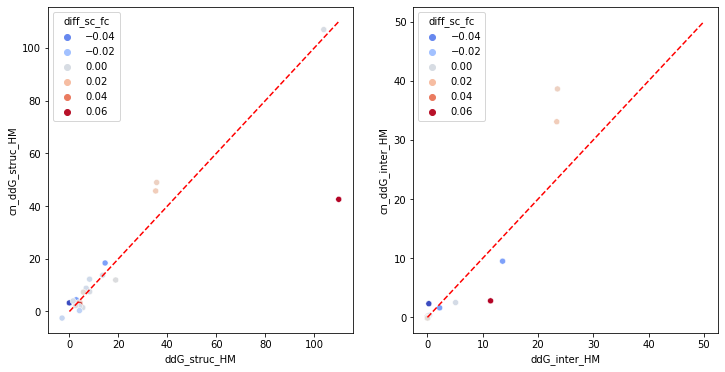

In [952]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.scatterplot(data = data_df, x= 'ddG_struc_HM', y='cn_ddG_struc_HM', hue='diff_sc_fc', palette='coolwarm')
plt.plot([0,110], [0,110], 'r--')

plt.subplot(122)
sns.scatterplot(data = data_df, x= 'ddG_inter_HM', y='cn_ddG_inter_HM', hue='diff_sc_fc', palette='coolwarm')
plt.plot([0,50], [0,50], 'r--')

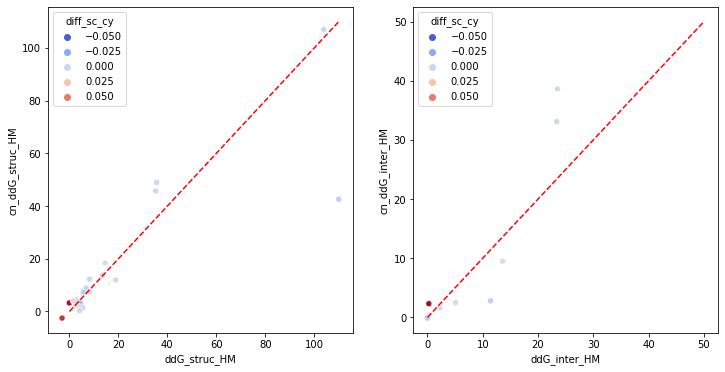

In [953]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.scatterplot(data = data_df, x= 'ddG_struc_HM', y='cn_ddG_struc_HM', hue='diff_sc_cy', palette='coolwarm')
plt.plot([0,110], [0,110], 'r--')

plt.subplot(122)
sns.scatterplot(data = data_df, x= 'ddG_inter_HM', y='cn_ddG_inter_HM', hue='diff_sc_cy', palette='coolwarm')
plt.plot([0,50], [0,50], 'r--')

In [954]:
stats.spearmanr(data_df['Sc_FC_average'], data_df['Cn_FC_average'], nan_policy='omit')


SpearmanrResult(correlation=0.6492094861660079, pvalue=0.0008027846018111321)

In [955]:
stats.spearmanr(data_df['Sc_CY_average'], data_df['Cn_CY_average'], nan_policy='omit')

SpearmanrResult(correlation=0.5247035573122529, pvalue=0.010154390039677701)

In [956]:
validations_df.columns

Index(['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2',
       'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1',
       'hap_cy_2', 'hap_fc_average', 'hap_cy_average', '2nd_batch_FC',
       '2nd_batch_CY', 'adjusted_2nd_batch_FC', 'adjusted_2nd_batch_CY',
       'combined_hap_fc', 'combined_hap_cy', 'escape_outlier',
       'Mutation cluster'],
      dtype='object')

In [957]:
first_batch_FC = {}
first_batch_CY = {}


for index in list(data_df.index):
    
    if index in list(validations_df.index):
        
        first_batch_FC[index] = validations_df.loc[index]['hap_fc_average']
        first_batch_CY[index] = validations_df.loc[index]['hap_cy_average']
        
    else:
        first_batch_FC[index] = np.NaN
        first_batch_CY[index] = np.NaN


        
data_df['val_FC'] = pd.Series(first_batch_FC)
data_df['val_CY'] = pd.Series(first_batch_CY)

data_df.head(10)

,Sc_FC_1,Sc_FC_2,Cn_FC_1,Cn_FC_2,Sc_CY_1,Sc_CY_2,Cn_CY_1,Cn_CY_2,Mutation cluster,Sc_FC_average,...,sc_wt,cn_pos,cn_wt,cn_ddG_struc_HM,cn_ddG_inter_HM,diff_sc_fc,diff_sc_cy,diff_sc,val_FC,val_CY
3156,0.08988,0.09128,0.05480,0.05440,0.00680,0.00788,0.06372,0.06244,Front minima,0.09058,...,W,155.0,W,3.31410,-0.04510,0.03598,-0.05574,0.03598,0.18640,0.02182
3208,0.06080,0.06028,0.09344,0.09340,0.01012,0.01040,0.00740,0.00600,Front minima,0.06054,...,E,157.0,E,4.43308,1.60894,-0.03288,0.00356,-0.03288,0.14894,0.02936
3249,0.07360,0.07448,0.06992,0.07092,0.00904,0.00988,0.02112,0.02116,Front minima,0.07404,...,I,159.0,I,3.37305,0.22150,0.00362,-0.01168,0.00362,0.15884,0.01588
3250,0.06440,0.06316,0.06692,0.06668,0.02288,0.02160,0.02660,0.02448,Front minima,0.06378,...,I,159.0,I,8.81496,0.36060,-0.00302,-0.00330,-0.00302,0.15546,0.02130
3274,0.11120,0.10952,0.09692,0.09780,0.00592,0.00532,0.00530,0.00580,Nonsense-like,0.11036,...,G,160.0,G,45.72922,33.06917,0.01300,0.00007,0.01300,0.20648,0.01174
3275,0.11248,0.11240,0.10164,0.10180,0.00772,0.00920,0.00668,0.00632,Nonsense-like,0.11244,...,G,160.0,G,48.96032,38.61218,0.01072,0.00196,0.01072,0.20662,0.01578
1915,0.05352,0.05420,0.10988,0.11152,0.07772,0.07952,0.00472,0.00508,Front minima,0.05386,...,M,96.0,M,3.26462,2.31114,-0.05684,0.07372,-0.05684,0.13704,0.07736
1921,0.07104,0.07240,0.10368,0.10368,0.01380,0.01400,0.00560,0.00540,Front minima,0.07172,...,M,96.0,M,18.40224,9.49704,-0.03196,0.00840,-0.03196,0.15564,0.04240
2298,0.11288,0.11452,0.11468,0.11440,0.00440,0.00432,0.00572,0.00540,Nonsense-like,0.11370,...,N,114.0,N,1.47150,0.00322,-0.00084,-0.00120,-0.00084,0.23684,0.01676
2445,0.11332,0.11348,0.05148,0.05232,0.00564,0.00612,0.01184,0.01204,Nonsense-like,0.11340,...,G,120.0,G,42.55434,2.79190,0.06150,-0.00606,0.06150,0.23052,0.01660


Text(0.5, 1.0, 'Cytosine')

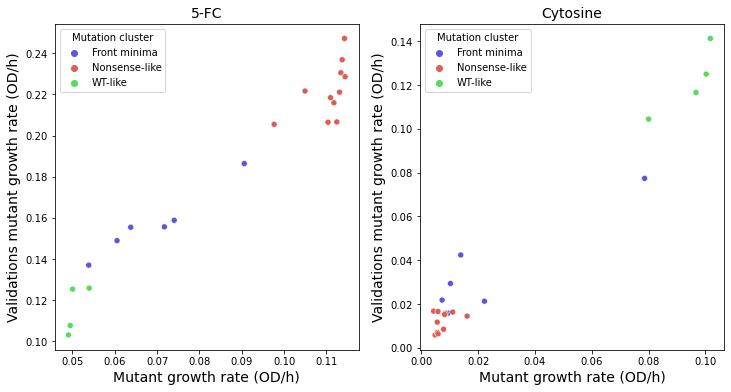

In [958]:
plt.figure(figsize=(12,6))

plt.subplot(121)
sns.scatterplot(data = data_df, x='Sc_FC_average', y='val_FC', hue='Mutation cluster', palette=mut_colors)


plt.xlabel('Mutant growth rate (OD/h)', fontsize=14)
plt.ylabel('Validations mutant growth rate (OD/h)', fontsize=14)
plt.title('5-FC', fontsize=14)


plt.subplot(122)
sns.scatterplot(data = data_df, x='Sc_CY_average', y='val_CY', hue='Mutation cluster', palette=mut_colors)

plt.xlabel('Mutant growth rate (OD/h)', fontsize=14)
plt.ylabel('Validations mutant growth rate (OD/h)', fontsize=14)
plt.title('Cytosine', fontsize=14)

In [959]:
stats.spearmanr(data_df['Sc_FC_average'], data_df['val_FC'], nan_policy='omit')


SpearmanrResult(correlation=0.9662337662337663, pvalue=1.2034510793722613e-12)

In [960]:
stats.spearmanr(data_df['Sc_CY_average'], data_df['val_CY'], nan_policy='omit')

SpearmanrResult(correlation=0.7610389610389611, pvalue=6.171018713341669e-05)

In [961]:
data_df[data_df['val_FC']>0.24]

,Sc_FC_1,Sc_FC_2,Cn_FC_1,Cn_FC_2,Sc_CY_1,Sc_CY_2,Cn_CY_1,Cn_CY_2,Mutation cluster,Sc_FC_average,...,sc_wt,cn_pos,cn_wt,cn_ddG_struc_HM,cn_ddG_inter_HM,diff_sc_fc,diff_sc_cy,diff_sc,val_FC,val_CY
2536,0.114,0.11452,0.11768,0.118,0.006,0.00536,0.00672,0.0062,Nonsense-like,0.11426,...,L,124.0,L,12.26176,0.08058,-0.00358,-0.00078,-0.00358,0.24718,0.00698


In [962]:
validations_df

,codon,wt,measured,mtx1,mtx2,dmso1,dmso2,mtx_average,dmso_average,hap_fc_1,...,hap_fc_average,hap_cy_average,2nd_batch_FC,2nd_batch_CY,adjusted_2nd_batch_FC,adjusted_2nd_batch_CY,combined_hap_fc,combined_hap_cy,escape_outlier,Mutation cluster
136,8,S,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,nan
168,10,W,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.111533,0.002547,0.219011,0.016087,0.219011,0.016087,Yes,Nonsense-like
227,12,Q,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.049200,0.086733,0.126145,0.139102,0.126145,0.139102,Yes,WT-like
261,14,G,W,0.01380,0.01360,0.21628,0.21208,0.0137,0.21418,0.20784,...,0.20750,0.01094,NaN,NaN,NaN,NaN,0.207500,0.010940,No,Nonsense-like
263,14,G,Y,0.01388,0.01552,0.20184,0.20676,0.0147,0.20430,0.16984,...,0.16960,0.03144,NaN,NaN,NaN,NaN,0.169600,0.031440,No,Front minima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.100987,0.004160,0.203298,0.018444,0.203298,0.018444,Yes,Nonsense-like
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,0.14988,...,0.15884,0.01588,NaN,NaN,NaN,NaN,0.158840,0.015880,No,Front minima
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,0.16264,...,0.15546,0.02130,NaN,NaN,NaN,NaN,0.155460,0.021300,No,Front minima
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,0.21184,...,0.20648,0.01174,NaN,NaN,NaN,NaN,0.206480,0.011740,Yes,Nonsense-like


In [963]:
data_df[['Sc_FC_average', 'Cn_FC_average', 'Sc_CY_average', 'Cn_CY_average', 'val_FC', 'val_CY']]


,Sc_FC_average,Cn_FC_average,Sc_CY_average,Cn_CY_average,val_FC,val_CY
3156,0.09058,0.05460,0.00734,0.06308,0.18640,0.02182
3208,0.06054,0.09342,0.01026,0.00670,0.14894,0.02936
3249,0.07404,0.07042,0.00946,0.02114,0.15884,0.01588
3250,0.06378,0.06680,0.02224,0.02554,0.15546,0.02130
3274,0.11036,0.09736,0.00562,0.00555,0.20648,0.01174
3275,0.11244,0.10172,0.00846,0.00650,0.20662,0.01578
1915,0.05386,0.11070,0.07862,0.00490,0.13704,0.07736
1921,0.07172,0.10368,0.01390,0.00550,0.15564,0.04240
2298,0.11370,0.11454,0.00436,0.00556,0.23684,0.01676
2445,0.11340,0.05190,0.00588,0.01194,0.23052,0.01660


In [964]:
phen_array = np.array([[4,2,0], [0,3,4], [0,3,11]])

phen_array

array([[ 4,  2,  0],
       [ 0,  3,  4],
       [ 0,  3, 11]])

In [965]:
import random
random.seed(0)

4
2
0
0
3
4
0
3
11


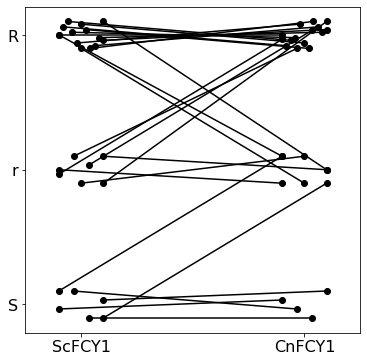

In [966]:
phens = ['S', 'r', 'R']

plt.figure(figsize=(6,6))

for y_1 in range(0,3):
    
    for y_2 in range(0,3):
        
        n_mut = phen_array[y_1][y_2]       
        print(n_mut)
        if n_mut >0:
        
            x_vals = np.linspace(0.9,1.1,n_mut)
            random.shuffle(x_vals)
            y_offset_1 = np.linspace(-0.1,0.1,n_mut)
            y_offset_2 = np.linspace(-0.1,0.1,n_mut)

            random.shuffle(y_offset_1)
            random.shuffle(y_offset_2)

        
            for mut in range(0,n_mut):

                plt.plot([x_vals[mut], x_vals[mut]+1], [y_1+y_offset_1[mut], y_2+y_offset_2[mut]], 'ko-')

        
plt.xticks([1,2], ['ScFCY1', 'CnFCY1'], fontsize=16)
plt.xlim(0.75, 2.25)

plt.yticks([0,1,2], ['S', 'r', 'R'], fontsize=16)

plt.savefig('./test_switch_phen.svg', format='svg', dpi=300)

In [967]:
sc_spot_dict={345:1,
              455:0,
              575:1,
              582:0,
              745:1,
              788:0,
              1023:1,
              1410:1,
              1527:0,
              1770:0.5,
              1778:1,
              1830:0,
              1854:0.5,
              1877:1,
              1915:0.5,
              1921:0.5,
              2298:1,
              2445:1,
              2534:1,
              2536:1,
              2967:0,
              3156:1,
              3208:0.5,
              3249:0.5,
              3250:0.5,
              3274:1,
              3275:1 ,
              'BY4742':0,
              'opt': 0,
              'delta':1,}
len(sc_spot_dict)

30

In [968]:
validations_df.columns

Index(['codon', 'wt', 'measured', 'mtx1', 'mtx2', 'dmso1', 'dmso2',
       'mtx_average', 'dmso_average', 'hap_fc_1', 'hap_fc_2', 'hap_cy_1',
       'hap_cy_2', 'hap_fc_average', 'hap_cy_average', '2nd_batch_FC',
       '2nd_batch_CY', 'adjusted_2nd_batch_FC', 'adjusted_2nd_batch_CY',
       'combined_hap_fc', 'combined_hap_cy', 'escape_outlier',
       'Mutation cluster'],
      dtype='object')

In [969]:
validations_df

,codon,wt,measured,mtx1,mtx2,dmso1,dmso2,mtx_average,dmso_average,hap_fc_1,...,hap_fc_average,hap_cy_average,2nd_batch_FC,2nd_batch_CY,adjusted_2nd_batch_FC,adjusted_2nd_batch_CY,combined_hap_fc,combined_hap_cy,escape_outlier,Mutation cluster
136,8,S,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,nan
168,10,W,*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.111533,0.002547,0.219011,0.016087,0.219011,0.016087,Yes,Nonsense-like
227,12,Q,K,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.049200,0.086733,0.126145,0.139102,0.126145,0.139102,Yes,WT-like
261,14,G,W,0.01380,0.01360,0.21628,0.21208,0.0137,0.21418,0.20784,...,0.20750,0.01094,NaN,NaN,NaN,NaN,0.207500,0.010940,No,Nonsense-like
263,14,G,Y,0.01388,0.01552,0.20184,0.20676,0.0147,0.20430,0.16984,...,0.16960,0.03144,NaN,NaN,NaN,NaN,0.169600,0.031440,No,Front minima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3233,155,D,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.100987,0.004160,0.203298,0.018444,0.203298,0.018444,Yes,Nonsense-like
3249,156,I,Q,NaN,NaN,NaN,NaN,NaN,NaN,0.14988,...,0.15884,0.01588,NaN,NaN,NaN,NaN,0.158840,0.015880,No,Front minima
3250,156,I,H,NaN,NaN,NaN,NaN,NaN,NaN,0.16264,...,0.15546,0.02130,NaN,NaN,NaN,NaN,0.155460,0.021300,No,Front minima
3274,157,G,D,NaN,NaN,NaN,NaN,NaN,NaN,0.21184,...,0.20648,0.01174,NaN,NaN,NaN,NaN,0.206480,0.011740,Yes,Nonsense-like


In [970]:

missing_info = list(data_df.columns)
validations_df_cols = list(validations_df.columns)

new_rows = []

for mutant in sc_spot_dict.keys():
    
    if mutant not in list(data_df.index) and type(mutant) == int:
        
        row_dict = {}
        
        for col in missing_info:
            
            if col in ['Sc_FC_1', "Sc_FC_2" "Cn_FC_1", "Cn_FC_2", "Sc_CY_1", "Sc_CY_2", "Cn_CY_1", "Cn_CY_2", "Sc_FC_average","Cn_FC_average", "Sc_CY_average", "Cn_CY_average"]:
                row_dict[col] = np.NaN
                
            elif col == 'Mutation cluster':
                row_dict[col] = validations_df.loc[mutant]['Mutation cluster']
                
            elif col == 'val_FC':
                row_dict[col] = validations_df.loc[mutant]['hap_fc_average']
                
            elif col == 'val_CY':
                row_dict[col] = validations_df.loc[mutant]['hap_cy_average']
            
        data_df.loc[mutant] = pd.Series(row_dict)
        
data_df

,Sc_FC_1,Sc_FC_2,Cn_FC_1,Cn_FC_2,Sc_CY_1,Sc_CY_2,Cn_CY_1,Cn_CY_2,Mutation cluster,Sc_FC_average,...,sc_wt,cn_pos,cn_wt,cn_ddG_struc_HM,cn_ddG_inter_HM,diff_sc_fc,diff_sc_cy,diff_sc,val_FC,val_CY
3156,0.08988,0.09128,0.05480,0.05440,0.00680,0.00788,0.06372,0.06244,Front minima,0.09058,...,W,155.0,W,3.31410,-0.04510,0.03598,-0.05574,0.03598,0.18640,0.02182
3208,0.06080,0.06028,0.09344,0.09340,0.01012,0.01040,0.00740,0.00600,Front minima,0.06054,...,E,157.0,E,4.43308,1.60894,-0.03288,0.00356,-0.03288,0.14894,0.02936
3249,0.07360,0.07448,0.06992,0.07092,0.00904,0.00988,0.02112,0.02116,Front minima,0.07404,...,I,159.0,I,3.37305,0.22150,0.00362,-0.01168,0.00362,0.15884,0.01588
3250,0.06440,0.06316,0.06692,0.06668,0.02288,0.02160,0.02660,0.02448,Front minima,0.06378,...,I,159.0,I,8.81496,0.36060,-0.00302,-0.00330,-0.00302,0.15546,0.02130
3274,0.11120,0.10952,0.09692,0.09780,0.00592,0.00532,0.00530,0.00580,Nonsense-like,0.11036,...,G,160.0,G,45.72922,33.06917,0.01300,0.00007,0.01300,0.20648,0.01174
3275,0.11248,0.11240,0.10164,0.10180,0.00772,0.00920,0.00668,0.00632,Nonsense-like,0.11244,...,G,160.0,G,48.96032,38.61218,0.01072,0.00196,0.01072,0.20662,0.01578
1915,0.05352,0.05420,0.10988,0.11152,0.07772,0.07952,0.00472,0.00508,Front minima,0.05386,...,M,96.0,M,3.26462,2.31114,-0.05684,0.07372,-0.05684,0.13704,0.07736
1921,0.07104,0.07240,0.10368,0.10368,0.01380,0.01400,0.00560,0.00540,Front minima,0.07172,...,M,96.0,M,18.40224,9.49704,-0.03196,0.00840,-0.03196,0.15564,0.04240
2298,0.11288,0.11452,0.11468,0.11440,0.00440,0.00432,0.00572,0.00540,Nonsense-like,0.11370,...,N,114.0,N,1.47150,0.00322,-0.00084,-0.00120,-0.00084,0.23684,0.01676
2445,0.11332,0.11348,0.05148,0.05232,0.00564,0.00612,0.01184,0.01204,Nonsense-like,0.11340,...,G,120.0,G,42.55434,2.79190,0.06150,-0.00606,0.06150,0.23052,0.01660


In [971]:
cn_spot_dict={345:1,
              455:0,
              575:1,
              582:0,
              745:1,
              788:0.5,
              1023:0.5,
              1410:1,
              1527:0,
              1770:0.5,
              1778:1,
              1830:0.5,
              1854:1,
              1877:1,
              1915:1,
              1921:1,
              2298:1,
              2445:0.5,
              2534:1,
              2536:1,
              2967:0,
              3156:0.5,
              3208:1,
              3249:0.5,
              3250:0.5,
              3274:1,
              3275:1,
             'BY4742':np.NaN,
             'opt': 0,
             'delta':1}
len(cn_spot_dict)

30

In [972]:
data_df['spot_sc'] = pd.Series(sc_spot_dict)
data_df['spot_cn'] = pd.Series(cn_spot_dict)

In [973]:
spot_array = {0:{0:[], 0.5:[], 1:[]},
              0.5:{0:[], 0.5:[], 1:[]},
              1:{0:[], 0.5:[], 1:[]}}


for index in data_df.index:
    
    if type(index) == int:
   
        sc_spot = data_df.loc[index]['spot_sc']
        cn_spot = data_df.loc[index]['spot_cn']
               
        spot_array[sc_spot][cn_spot].append(index)
spot_array

{0: {0: [1527, 455, 582, 2967], 0.5: [788, 1830], 1: []},
 0.5: {0: [], 0.5: [3249, 3250, 1770], 1: [3208, 1915, 1921, 1854]},
 1: {0: [],
  0.5: [3156, 2445, 1023],
  1: [3274, 3275, 2298, 2534, 2536, 745, 1410, 345, 575, 1778, 1877]}}

4
2
0
0
3
4
0
3
11


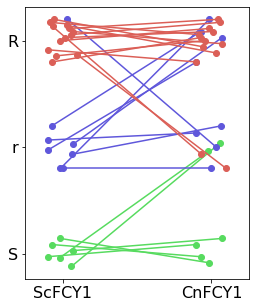

In [974]:
random.seed(5)

plt.figure(figsize=(4,5))

for y_1 in [0, 0.5, 1]:
    
    for y_2 in [0, 0.5, 1]:
        
        mut_list = spot_array[y_1][y_2]
        
        n_mut = len(mut_list)       
        print(n_mut)
        if n_mut >0:
        
            x_vals = np.linspace(0.9,1.1,n_mut+4)
            random.shuffle(x_vals)
            y_offset_1 = np.linspace(-0.1,0.1,n_mut+4)
            y_offset_2 = np.linspace(-0.1,0.1,n_mut+4)

            random.shuffle(y_offset_1)
            random.shuffle(y_offset_2)

        
            for mut in range(0,n_mut):
                
                color = mut_colors[data_df.loc[mut_list[mut]]['Mutation cluster']]

                plt.plot([x_vals[mut], x_vals[mut]+1], [y_1+y_offset_1[mut], y_2+y_offset_2[mut]], 'o-', color=color)

        
plt.xticks([1,2], ['ScFCY1', 'CnFCY1'], fontsize=16)
plt.xlim(0.75, 2.25)

plt.yticks([0,0.5,1], ['S', 'r', 'R'], fontsize=16)

plt.savefig('./test_switch_phen.svg', format='svg', dpi=300)

In [485]:
data_df.columns

Index(['Sc_FC_1', 'Sc_FC_2', 'Cn_FC_1', 'Cn_FC_2', 'Sc_CY_1', 'Sc_CY_2',
       'Cn_CY_1', 'Cn_CY_2', 'Mutation cluster', 'Sc_FC_average',
       'Cn_FC_average', 'Sc_CY_average', 'Cn_CY_average', 'val_FC', 'val_CY',
       'spot_sc', 'spot_cn'],
      dtype='object')

<AxesSubplot:xlabel='spot_sc', ylabel='Sc_FC_average'>

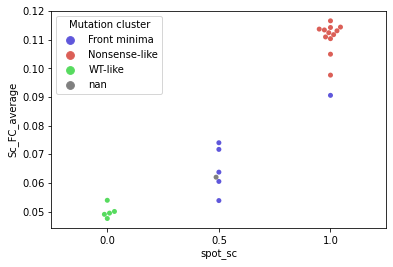

In [486]:
sns.swarmplot(data = data_df, y='Sc_FC_average', x ='spot_sc', hue='Mutation cluster', palette=mut_colors)

<AxesSubplot:xlabel='spot_sc', ylabel='Sc_CY_average'>

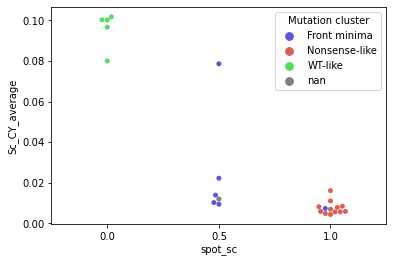

In [487]:
sns.swarmplot(data = data_df, y='Sc_CY_average', x ='spot_sc', hue='Mutation cluster', palette=mut_colors)

<AxesSubplot:xlabel='spot_cn', ylabel='Cn_FC_average'>

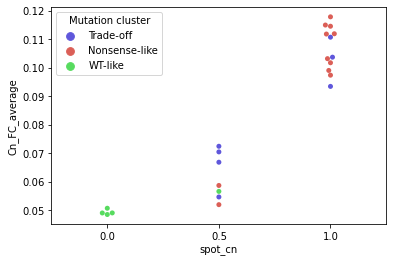

In [132]:
sns.swarmplot(data = data_df, y='Cn_FC_average', x ='spot_cn', hue='Mutation cluster', palette=mut_colors)

<AxesSubplot:xlabel='spot_cn', ylabel='Cn_CY_average'>

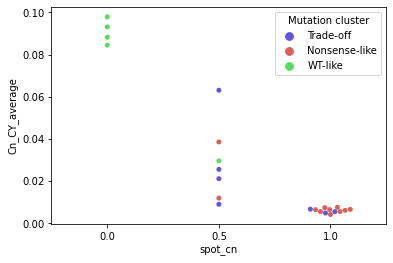

In [133]:
sns.swarmplot(data = data_df, y='Cn_CY_average', x ='spot_cn', hue='Mutation cluster', palette=mut_colors)

In [134]:
align_pos_dict = {}
wt_sc_dict = {}
wt_cn_dict = {}
measured_dict = {}

for mutant in [ x for x in data_df.index if type(x)==int]:
    
    mutant_info=selected_sites_data.loc[mutant]
    
    codon = mutant_info['codon']
    wt = mutant_info['wt']
    measured = mutant_info['measured']
    fc_phen = mutant_info['hap_fc_average']
    
    codon_align_pos = cer_pos_to_align_pos[codon]
    
    crypto_neo_codon = align_pos_to_neo_pos[codon_align_pos]
    
    codon_start = ((crypto_neo_codon-1)*3)+40
    codon_end = ((crypto_neo_codon-1)*3)+43
    wt_codon = insert_sequence[((crypto_neo_codon-1)*3)+40:((crypto_neo_codon-1)*3)+43]
    wt_aa = codontable_standard[wt_codon]
    
    align_pos_dict[mutant] = int(codon_align_pos)
    wt_sc_dict[mutant] = wt
    wt_cn_dict[mutant] = wt_aa
    measured_dict[mutant] = measured
    
    print(wt, codon, wt_aa, crypto_neo_codon)

W 152 W 155
E 154 E 157
I 156 I 159
I 156 I 159
G 157 G 160
G 157 G 160
M 93 M 96
M 93 M 96
N 111 N 114
G 118 G 120
L 122 L 124
L 122 L 124
L 37 L 40
N 39 H 42
H 50 H 53
E 69 E 72
L 74 V 77
T 86 T 89
A 18 A 21
A 23 L 26
G 29 G 32
G 29 G 32
T 86 T 89
S 89 S 92
P 90 P 93
C 91 C 94
Q 143 N 145


In [135]:
data_df['align_pos'] = pd.Series(align_pos_dict)
data_df['wt_sc'] = pd.Series(wt_sc_dict)
data_df['wt_cn'] = pd.Series(wt_cn_dict)
data_df['measured'] = pd.Series(measured_dict)

In [136]:
data_df[['Mutation cluster']]

,Mutation cluster
3156,Trade-off
3208,Trade-off
3249,Trade-off
3250,Trade-off
3274,Nonsense-like
3275,Nonsense-like
1915,Trade-off
1921,Trade-off
2298,Nonsense-like
2445,Nonsense-like


In [137]:
data_df[data_df['wt_sc']!=data_df['wt_cn']]

,Sc_FC_1,Sc_FC_2,Cn_FC_1,Cn_FC_2,Sc_CY_1,Sc_CY_2,Cn_CY_1,Cn_CY_2,Mutation cluster,Sc_FC_average,...,Sc_CY_average,Cn_CY_average,val_FC,val_CY,spot_sc,spot_cn,align_pos,wt_sc,wt_cn,measured
788,0.04908,0.04988,0.05572,0.05740,0.09792,0.09552,0.02968,0.02948,WT-like,0.04948,...,0.09672,0.02958,0.10770,0.11656,0.0,0.5,41.0,N,H,Y
1527,0.04960,0.05052,0.04860,0.04940,0.10228,0.10124,0.09248,0.09368,WT-like,0.05006,...,0.10176,0.09308,0.12538,0.14122,0.0,0.0,76.0,L,V,Q
455,0.04900,0.04912,0.05140,0.04988,0.09940,0.10116,0.08400,0.08488,WT-like,0.04906,...,0.10028,0.08444,0.10310,0.12496,0.0,0.0,25.0,A,L,N
opt,0.04748,0.04772,0.04800,0.04888,0.10004,0.10032,0.09680,0.09892,WT-like,0.04760,...,0.10018,0.09786,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4742,0.04992,0.04900,NaN,NaN,0.09660,0.09900,NaN,NaN,WT-like,0.04946,...,0.09780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
delta,0.11664,0.11652,NaN,NaN,0.00628,0.00772,NaN,NaN,Nonsense-like,0.11658,...,0.00700,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WT-like,NaN,...,NaN,NaN,0.14082,0.12886,0.0,0.0,145.0,Q,N,M


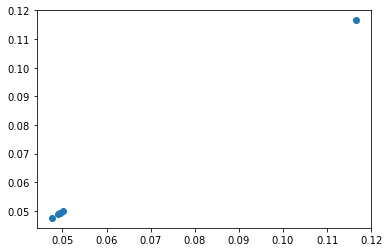

In [138]:
plt.scatter(data_df[data_df['wt_sc']!=data_df['wt_cn']]['Sc_FC_average'], data_df[data_df['wt_sc']!=data_df['wt_cn']]['Sc_FC_average'])